# **1. An√°lisis de Reacciones Adversas a Vacunas contra COVID-19 (VAERS)**üìä
Introducci√≥n y Objetivos


## **1.1 Introducci√≥n**

Este an√°lisis se basa en un conjunto de datos disponible en **Kaggle**, derivado del Vaccine Adverse Event Reporting System (**VAERS**), un sistema de vigilancia administrado por los CDC y la FDA en Estados Unidos. VAERS recopila reportes voluntarios de eventos adversos ocurridos tras la vacunaci√≥n, con el prop√≥sito de identificar se√±ales tempranas que puedan requerir estudios m√°s profundos.

üîóLink del Dataset disponible en Kaggle: https://www.kaggle.com/datasets/landfallmotto/covid19-vaccine-adverse-reactions-vaers-dataset/data

üëâ **Importante:** VAERS es un sistema de notificaci√≥n pasiva, lo que significa que depende de que las personas env√≠en sus experiencias de manera voluntaria. No est√° dise√±ado para establecer causalidad entre la vacuna y el evento reportado, pero resulta valioso para detectar posibles riesgos que ameritan investigaci√≥n adicional.

- Sitio web: https://vaers.hhs.gov/

- Gu√≠a de datos del VAERS: https://drive.google.com/file/d/1QbebS5YN9Yt5nHpB7rDFHyReYd8NSNw5/view?usp=sharing


## **1.2 Objetivos del An√°lisis**

El objetivo de este trabajo es **explorar, limpiar y analizar** los registros de eventos adversos asociados a vacunas COVID-19 para:

*   Describir la distribuci√≥n de eventos adversos seg√∫n edad, sexo y fabricante de la vacuna.

*  Identificar los eventos adversos m√°s frecuentes y su severidad.  

*   Aplicar modelos de *Machine Learning* para:  
        - Predecir hospitalizaci√≥n o desenlaces severos.  
         






# 2. Importaci√≥n de Librer√≠as üìë

In [ ]:
import pandas as pd
import numpy as np

# Visualizaci√≥n
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Modelos ML
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

# Manejo de warnings (para limpiar outputs)
import warnings
warnings.filterwarnings('ignore')


# 3. Carga del Dataset e Informaci√≥n General üìà




## **3.1 Subir el archivo desde Google Drive:**

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/1.1. Data Science UTN BA/Proyecto FINAL/vaers_jan_nov_2021.csv'


# Opci√≥n recomendada para archivos grandes
df = pd.read_csv(file_path, low_memory=False, encoding='latin-1')




## **3.2 Dimensiones, Informaci√≥n General**

In [ ]:
# Dimensiones del dataset (filas, columnas)
print("Dimensiones:", df.shape)
df.head()


Dimensiones: (890836, 52)


VAERS_ID                 SYMPTOM1  SYMPTOMVERSION1  \
0    916600                Dysphagia             23.1   
1    916601                  Anxiety             23.1   
2    916602         Chest discomfort             23.1   
3    916603                Dizziness             23.1   
4    916604  Injection site erythema             23.1   

                  SYMPTOM2  SYMPTOMVERSION2                 SYMPTOM3  \
0             Epiglottitis             23.1                      NaN   
1                 Dyspnoea             23.1                      NaN   
2                Dysphagia             23.1        Pain in extremity   
3                  Fatigue             23.1       Mobility decreased   
4  Injection site pruritus             23.1  Injection site swelling   

   SYMPTOMVERSION3               SYMPTOM4  SYMPTOMVERSION4 SYMPTOM5  ...  \
0              NaN                    NaN              NaN      NaN  ...   
1              NaN                    NaN              NaN      NaN  ...   
2             23.1      Visual impairment             23.1      NaN  ...   
3             23.1                    NaN              NaN      NaN  ...   
4             23.1  Injection site warmth             23.1      NaN  ...   

                                             CUR_ILL  \
0                                                NaN   
1  Patient residing at nursing facility. See pati...   
2                                                NaN   
3                                   kidney infection   
4                                                 Na   

                                             HISTORY  \
0                                                NaN   
1  Patient residing at nursing facility. See pati...   
2                                                NaN   
3  diverticulitis, mitral valve prolapse, osteoar...   
4                                                NaN   

                                           PRIOR_VAX SPLTTYPE FORM_VERS  \
0                                                NaN      NaN         2   
1                                                NaN      NaN         2   
2                                                NaN      NaN         2   
3  got measles from measel shot, mums from mumps ...      NaN         2   
4                                                NaN      NaN         2   

  TODAYS_DATE BIRTH_DEFECT OFC_VISIT ER_ED_VISIT  \
0  01/01/2021          NaN         Y         NaN   
1  01/01/2021          NaN         Y         NaN   
2  01/01/2021          NaN       NaN           Y   
3  01/01/2021          NaN       NaN         NaN   
4  01/01/2021          NaN       NaN         NaN   

                                           ALLERGIES  
0                                  Pcn and bee venom  
1                                            "Dairy"  
2                                          Shellfish  
3  Diclofenac, novacaine, lidocaine, pickles, tom...  
4                                                 Na  

[5 rows x 52 columns]

In [ ]:
# Informaci√≥n general del dataset
print("\n--- Informaci√≥n del dataset ---")
df.info()


--- Informaci√≥n del dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890836 entries, 0 to 890835
Data columns (total 52 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         890836 non-null  int64  
 1   SYMPTOM1         890836 non-null  object 
 2   SYMPTOMVERSION1  890836 non-null  float64
 3   SYMPTOM2         700014 non-null  object 
 4   SYMPTOMVERSION2  700014 non-null  float64
 5   SYMPTOM3         542889 non-null  object 
 6   SYMPTOMVERSION3  542889 non-null  float64
 7   SYMPTOM4         414887 non-null  object 
 8   SYMPTOMVERSION4  414887 non-null  float64
 9   SYMPTOM5         311516 non-null  object 
 10  SYMPTOMVERSION5  311516 non-null  float64
 11  VAX_TYPE         890836 non-null  object 
 12  VAX_MANU         890836 non-null  object 
 13  VAX_LOT          630254 non-null  object 
 14  VAX_DOSE_SERIES  887049 non-null  object 
 15  VAX_ROUTE        690043 non-null  object 
 16  VAX_

# 4. Diccionario üìö

Los datos incluyen informaci√≥n sobre:
- **Vacunas:** Pfizer/BioNTech, Moderna y Johnson & Johnson (Janssen).  
- **Eventos adversos reportados:** s√≠ntomas principales y secundarios, severidad, hospitalizaci√≥n y fallecimiento.  
- **Caracter√≠sticas del paciente:** edad, sexo, alergias, enfermedades preexistentes.  
- **Informaci√≥n de vacunaci√≥n:** tipo de vacuna, fabricante, dosis, fechas relevantes.  

**Ejemplos de variables incluidas:**

| Columna     | Descripci√≥n |
|-------------|-------------|
| VAERS_ID    | N√∫mero de identificaci√≥n del reporte |
| SYMPTOM1-5  | Eventos adversos reportados (hasta 5 por paciente, seg√∫n terminolog√≠a MedDRA) |
| VAX_MANU    | Fabricante de la vacuna |
| AGE_YRS     | Edad del paciente en a√±os |
| SEX         | Sexo del paciente |
| HOSPITAL    | Hospitalizaci√≥n (S√≠/No) |
| DIED        | Fallecimiento (S√≠/No) |



Para obtener m√°s detalles sobre las caracter√≠sticas, consulte la gu√≠a de uso de datos de VAERS: https://drive.google.com/file/d/1QbebS5YN9Yt5nHpB7rDFHyReYd8NSNw5/view?usp=sharing  

üö©A su vez, se encuentran detalladas las caracteristicas de las 52 columnas del presente dataset, con su respectiva descripci√≥n, en el siguiente archivo: https://docs.google.com/spreadsheets/d/1VvoOLlDhtRsIJz-XC9Ey8-lF1kFRoIwP/edit?usp=sharing&ouid=113037223966888902578&rtpof=true&sd=true

# 5. Exploraci√≥n inicial de las Variables (dataset crudo) üîç

 **1. Separar tipos de variables (categ√≥rica/num√©rica)**

In [ ]:
df.info()
df.select_dtypes(include=['object']).columns   # categ√≥ricas
df.select_dtypes(include=['int64','float64']).columns   # num√©ricas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890836 entries, 0 to 890835
Data columns (total 52 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         890836 non-null  int64  
 1   SYMPTOM1         890836 non-null  object 
 2   SYMPTOMVERSION1  890836 non-null  float64
 3   SYMPTOM2         700014 non-null  object 
 4   SYMPTOMVERSION2  700014 non-null  float64
 5   SYMPTOM3         542889 non-null  object 
 6   SYMPTOMVERSION3  542889 non-null  float64
 7   SYMPTOM4         414887 non-null  object 
 8   SYMPTOMVERSION4  414887 non-null  float64
 9   SYMPTOM5         311516 non-null  object 
 10  SYMPTOMVERSION5  311516 non-null  float64
 11  VAX_TYPE         890836 non-null  object 
 12  VAX_MANU         890836 non-null  object 
 13  VAX_LOT          630254 non-null  object 
 14  VAX_DOSE_SERIES  887049 non-null  object 
 15  VAX_ROUTE        690043 non-null  object 
 16  VAX_SITE         677970 non-null  obje

Index(['VAERS_ID', 'SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3',
       'SYMPTOMVERSION4', 'SYMPTOMVERSION5', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO',
       'HOSPDAYS', 'NUMDAYS', 'FORM_VERS'],
      dtype='object')

**2. Explorar variables categ√≥ricas: Valores √∫nicos y frecuencias.**

In [ ]:
for col in df.select_dtypes(include=['object']).columns[:5]:  # ej. primeras 5
    print(f"\nColumna: {col}")
    print(df[col].value_counts(dropna=False).head(10))



Columna: SYMPTOM1
SYMPTOM1
Chills                     48524
Arthralgia                 35560
Dizziness                  29820
Fatigue                    24773
Headache                   23018
COVID-19                   22465
Asthenia                   19923
Pyrexia                    18331
Injection site erythema    16335
Pain                       13895
Name: count, dtype: int64

Columna: SYMPTOM2
SYMPTOM2
NaN                  190822
Headache              33782
Fatigue               31809
Chills                24936
Dizziness             19099
Pyrexia               18231
Pain                  17330
Pain in extremity     14642
Nausea                13832
Dyspnoea              11012
Name: count, dtype: int64

Columna: SYMPTOM3
SYMPTOM3
NaN                  347947
Headache              29922
Fatigue               22399
Pyrexia               20809
Pain                  19893
Nausea                15567
Pain in extremity     13599
Dizziness             10321
Myalgia                9443
Dy

**2¬¥. Explorar variables categ√≥ricas: Cardinalidad de Categ√≥ricas**

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
cardinalidad = df[cat_cols].nunique().sort_values(ascending=False)
print(cardinalidad)


SYMPTOM_TEXT       599417
OTHER_MEDS         237177
HISTORY            163603
LAB_DATA           143624
ALLERGIES          108130
SPLTTYPE            93555
CUR_ILL             56346
VAX_LOT             27030
PRIOR_VAX           26715
SYMPTOM1             7077
SYMPTOM2             6752
SYMPTOM3             6297
SYMPTOM4             5710
SYMPTOM5             5282
VAX_DATE             1199
ONSET_DATE            713
TODAYS_DATE           365
DATEDIED              325
RECVDATE              309
RPT_DATE               81
STATE                  64
VAX_SITE               11
V_ADMINBY               9
VAX_ROUTE               9
VAX_DOSE_SERIES         8
VAX_MANU                4
VAX_NAME                4
V_FUNDBY                4
SEX                     3
RECOVD                  3
VAX_TYPE                1
DIED                    1
DISABLE                 1
X_STAY                  1
HOSPITAL                1
ER_VISIT                1
L_THREAT                1
BIRTH_DEFECT            1
OFC_VISIT   

**3. Explorar variables num√©ricas: Distribuci√≥n con .describe()**

In [ ]:
df.describe()


VAERS_ID  SYMPTOMVERSION1  SYMPTOMVERSION2  SYMPTOMVERSION3  \
count  8.908360e+05    890836.000000    700014.000000    542889.000000   
mean   1.348523e+06        23.938168        23.938262        23.937684   
std    2.682631e+05         0.250567         0.250345         0.251181   
min    9.166000e+05        23.100000        23.100000        23.100000   
25%    1.120193e+06        24.000000        24.000000        24.000000   
50%    1.316782e+06        24.000000        24.000000        24.000000   
75%    1.587308e+06        24.000000        24.000000        24.000000   
max    1.845804e+06        24.100000        24.100000        24.100000   

       SYMPTOMVERSION4  SYMPTOMVERSION5        AGE_YRS        CAGE_YR  \
count    414887.000000    311516.000000  819268.000000  728957.000000   
mean         23.939902        23.940053      50.053790      49.768582   
std           0.249035         0.250619      18.574649      18.740089   
min          23.100000        23.100000       0.080000       0.000000   
25%          24.000000        24.000000      36.000000      35.000000   
50%          24.000000        24.000000      50.000000      50.000000   
75%          24.000000        24.000000      65.000000      64.000000   
max          24.100000        24.100000     119.000000     120.000000   

           CAGE_MO      HOSPDAYS        NUMDAYS      FORM_VERS  
count  1327.000000  65176.000000  799488.000000  890836.000000  
mean      0.061567     21.109120      28.330898       1.999589  
std       0.157421   1238.533017     595.442248       0.020265  
min       0.000000      1.000000       0.000000       1.000000  
25%       0.000000      2.000000       0.000000       2.000000  
50%       0.000000      3.000000       1.000000       2.000000  
75%       0.000000      7.000000       7.000000       2.000000  
max       1.000000  99999.000000   44224.000000       2.000000

**4. Duplicados**

In [ ]:
duplicados = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicados}")


Cantidad de filas duplicadas: 1661


**4. Porcentaje de Valores Nulos**

In [ ]:
porcentaje_nulos = df.isnull().mean().sort_values(ascending=False) * 100
print(porcentaje_nulos)


ER_VISIT           99.994275
RPT_DATE           99.964528
V_FUNDBY           99.958915
X_STAY             99.928382
BIRTH_DEFECT       99.922432
CAGE_MO            99.851039
DATEDIED           98.359967
DIED               98.223691
DISABLE            97.535798
L_THREAT           97.467098
PRIOR_VAX          94.647275
HOSPDAYS           92.683726
HOSPITAL           89.905662
ER_ED_VISIT        83.352604
OFC_VISIT          77.134287
SPLTTYPE           72.342496
CUR_ILL            68.234333
SYMPTOM5           65.031049
SYMPTOMVERSION5    65.031049
LAB_DATA           59.975012
ALLERGIES          54.118266
SYMPTOMVERSION4    53.427230
SYMPTOM4           53.427230
OTHER_MEDS         42.876467
HISTORY            42.198340
SYMPTOM3           39.058480
SYMPTOMVERSION3    39.058480
VAX_LOT            29.251400
VAX_SITE           23.895083
VAX_ROUTE          22.539839
SYMPTOMVERSION2    21.420553
SYMPTOM2           21.420553
CAGE_YR            18.171583
STATE              10.729921
NUMDAYS       

## 5.1 üìçResumen Estad√≠stico Inicial

En este apartado se presenta un primer resumen de las variables num√©ricas y categ√≥ricas **con el dataset crudo**, antes de realizar cualquier tipo de limpieza.  
Esto permite identificar rangos, valores at√≠picos y posibles problemas de calidad de datos.
- **Variables num√©ricas:** se muestran estad√≠sticas como media, desviaci√≥n est√°ndar, m√≠nimo, m√°ximo y percentiles.  
- **Variables categ√≥ricas:** se observa la cantidad de valores, n√∫mero de categor√≠as √∫nicas y la moda (valor m√°s frecuente).  

In [ ]:
# Resumen de variables num√©ricas
df.describe().T


count          mean            std        min         25%  \
VAERS_ID         890836.0  1.348523e+06  268263.086042  916600.00  1120192.75   
SYMPTOMVERSION1  890836.0  2.393817e+01       0.250567      23.10       24.00   
SYMPTOMVERSION2  700014.0  2.393826e+01       0.250345      23.10       24.00   
SYMPTOMVERSION3  542889.0  2.393768e+01       0.251181      23.10       24.00   
SYMPTOMVERSION4  414887.0  2.393990e+01       0.249035      23.10       24.00   
SYMPTOMVERSION5  311516.0  2.394005e+01       0.250619      23.10       24.00   
AGE_YRS          819268.0  5.005379e+01      18.574649       0.08       36.00   
CAGE_YR          728957.0  4.976858e+01      18.740089       0.00       35.00   
CAGE_MO            1327.0  6.156745e-02       0.157421       0.00        0.00   
HOSPDAYS          65176.0  2.110912e+01    1238.533017       1.00        2.00   
NUMDAYS          799488.0  2.833090e+01     595.442248       0.00        0.00   
FORM_VERS        890836.0  1.999589e+00       0.020265       1.00        2.00   

                       50%         75%        max  
VAERS_ID         1316782.5  1587308.25  1845804.0  
SYMPTOMVERSION1       24.0       24.00       24.1  
SYMPTOMVERSION2       24.0       24.00       24.1  
SYMPTOMVERSION3       24.0       24.00       24.1  
SYMPTOMVERSION4       24.0       24.00       24.1  
SYMPTOMVERSION5       24.0       24.00       24.1  
AGE_YRS               50.0       65.00      119.0  
CAGE_YR               50.0       64.00      120.0  
CAGE_MO                0.0        0.00        1.0  
HOSPDAYS               3.0        7.00    99999.0  
NUMDAYS                1.0        7.00    44224.0  
FORM_VERS              2.0        2.00        2.0

In [ ]:
# Resumen de variables categ√≥ricas
df.describe(include=['object']).T


count  unique                                     top  \
SYMPTOM1         890836    7077                                  Chills   
SYMPTOM2         700014    6752                                Headache   
SYMPTOM3         542889    6297                                Headache   
SYMPTOM4         414887    5710                                 Pyrexia   
SYMPTOM5         311516    5282                                 Pyrexia   
VAX_TYPE         890836       1                                 COVID19   
VAX_MANU         890836       4                                 MODERNA   
VAX_LOT          630254   27030                                 Unknown   
VAX_DOSE_SERIES  887049       8                                       1   
VAX_ROUTE        690043       9                                      IM   
VAX_SITE         677970      11                                      LA   
VAX_NAME         890836       4             COVID19 (COVID19 (MODERNA))   
RECVDATE         890836     309                              08/22/2021   
STATE            795250      64                                      CA   
SEX              890836       3                                       F   
RPT_DATE            316      81                              01/27/2021   
SYMPTOM_TEXT     890460  599417  Error: Improper Storage (temperature)-   
DIED              15824       1                                       Y   
DATEDIED          14610     325                              02/12/2021   
L_THREAT          22564       1                                       Y   
ER_VISIT             51       1                                       Y   
HOSPITAL          89924       1                                       Y   
X_STAY              638       1                                       Y   
DISABLE           21952       1                                       Y   
RECOVD           817819       3                                       N   
VAX_DATE         840719    1199                              04/01/2021   
ONSET_DATE       834734     713                              04/01/2021   
LAB_DATA         356557  143624                                    none   
V_ADMINBY        890836       9                                     UNK   
V_FUNDBY            366       4                                     OTH   
OTHER_MEDS       508877  237177                                    none   
CUR_ILL          282980   56346                                    none   
HISTORY          514918  163603                                    none   
PRIOR_VAX         47684   26715                                Flu shot   
SPLTTYPE         246383   93555               USMODERNATX, INC.MOD20210   
TODAYS_DATE      884605     365                              08/12/2021   
BIRTH_DEFECT        691       1                                       Y   
OFC_VISIT        203696       1                                       Y   
ER_ED_VISIT      148301       1                                       Y   
ALLERGIES        408731  108130                                    none   

                   freq  
SYMPTOM1          48524  
SYMPTOM2          33782  
SYMPTOM3          29922  
SYMPTOM4          22384  
SYMPTOM5          20354  
VAX_TYPE         890836  
VAX_MANU         407296  
VAX_LOT           11094  
VAX_DOSE_SERIES  457939  
VAX_ROUTE        397893  
VAX_SITE         475599  
VAX_NAME         407296  
RECVDATE          18435  
STATE             86381  
SEX              614016  
RPT_DATE             24  
SYMPTOM_TEXT       1682  
DIED              15824  
DATEDIED            121  
L_THREAT          22564  
ER_VISIT             51  
HOSPITAL          89924  
X_STAY              638  
DISABLE           21952  
RECOVD           350447  
VAX_DATE          12130  
ONSET_DATE        13963  
LAB_DATA          32627  
V_ADMINBY        239008  
V_FUNDBY            211  
OTHER_MEDS        22237  
CUR_ILL           76058  
HISTORY           36272  
PRIOR_VAX           349  
SPLTTYPE          63271  
TODAYS

# 6. Limpieza üßπ

### **6.1 Manejo de Valores Nulos ‚â•25%**

In [ ]:
# Calcular el porcentaje de valores nulos por columna
null_percent = df.isnull().mean() * 100

# Filtrar columnas con 25% o m√°s de valores nulos
high_null_cols = null_percent[null_percent >= 25].sort_values(ascending=False)

# Crear tabla con nombre de columna y porcentaje de nulos
tabla_nulos = pd.DataFrame({
    'Columna': high_null_cols.index,
    'Porcentaje de Nulos (%)': high_null_cols.values
})

# Mostrar la tabla
print("Columnas con ‚â•25% de valores nulos:")
display(tabla_nulos)

Columnas con ‚â•25% de valores nulos:


Columna  Porcentaje de Nulos (%)
0          ER_VISIT                99.994275
1          RPT_DATE                99.964528
2          V_FUNDBY                99.958915
3            X_STAY                99.928382
4      BIRTH_DEFECT                99.922432
5           CAGE_MO                99.851039
6          DATEDIED                98.359967
7              DIED                98.223691
8           DISABLE                97.535798
9          L_THREAT                97.467098
10        PRIOR_VAX                94.647275
11         HOSPDAYS                92.683726
12         HOSPITAL                89.905662
13      ER_ED_VISIT                83.352604
14        OFC_VISIT                77.134287
15         SPLTTYPE                72.342496
16          CUR_ILL                68.234333
17         SYMPTOM5                65.031049
18  SYMPTOMVERSION5                65.031049
19         LAB_DATA                59.975012
20        ALLERGIES                54.118266
21  SYMPTOMVERSION4                53.427230
22         SYMPTOM4                53.427230
23       OTHER_MEDS                42.876467
24          HISTORY                42.198340
25  SYMPTOMVERSION3                39.058480
26         SYMPTOM3                39.058480
27          VAX_LOT                29.251400

El siguiente paso es comprar la tabla de columnas con alto porcentaje de valores nulos con el archivo diccionario de este data set, as√≠ podr√© establecer un criterio o considerar si eliminar columnas con altos porcentajes de valores nulos interferir√° o no sobre mis objetivos previamente planteados.

In [ ]:
# Ruta al archivo desde Drive
ruta_diccionario = '/content/drive/MyDrive/1.1. Data Science UTN BA/Proyecto FINAL/Features.csv'

# Cargar el archivo CSV
diccionario = pd.read_csv(ruta_diccionario)

# Verificar las primeras filas
diccionario.head()


Feature                          Desription
0         VAERS_ID         VAERS Identification Number
1         SYMPTOM1         Adverse Event MedDRA Term 1
2  SYMPTOMVERSION1  MedDRA dictionary version number 1
3         SYMPTOM2         Adverse Event MedDRA Term 1
4  SYMPTOMVERSION2  MedDRA dictionary version number 2

In [ ]:
# Unir por nombre de variable
comparacion = pd.merge(tabla_nulos, diccionario, left_on='Columna', right_on='Feature', how='left')

# Mostrar tabla comparativa
display(comparacion)

Columna  Porcentaje de Nulos (%)          Feature  \
0          ER_VISIT                99.994275         ER_VISIT   
1          RPT_DATE                99.964528         RPT_DATE   
2          V_FUNDBY                99.958915         V_FUNDBY   
3            X_STAY                99.928382           X_STAY   
4      BIRTH_DEFECT                99.922432     BIRTH_DEFECT   
5           CAGE_MO                99.851039          CAGE_MO   
6          DATEDIED                98.359967         DATEDIED   
7              DIED                98.223691             DIED   
8           DISABLE                97.535798          DISABLE   
9          L_THREAT                97.467098         L_THREAT   
10        PRIOR_VAX                94.647275        PRIOR_VAX   
11         HOSPDAYS                92.683726         HOSPDAYS   
12         HOSPITAL                89.905662         HOSPITAL   
13      ER_ED_VISIT                83.352604      ER_ED_VISIT   
14        OFC_VISIT                77.134287        OFC_VISIT   
15         SPLTTYPE                72.342496         SPLTTYPE   
16          CUR_ILL                68.234333          CUR_ILL   
17         SYMPTOM5                65.031049         SYMPTOM5   
18  SYMPTOMVERSION5                65.031049  SYMPTOMVERSION5   
19         LAB_DATA                59.975012         LAB_DATA   
20        ALLERGIES                54.118266              NaN   
21  SYMPTOMVERSION4                53.427230  SYMPTOMVERSION4   
22         SYMPTOM4                53.427230         SYMPTOM4   
23       OTHER_MEDS                42.876467       OTHER_MEDS   
24          HISTORY                42.198340          HISTORY   
25  SYMPTOMVERSION3                39.058480  SYMPTOMVERSION3   
26         SYMPTOM3                39.058480         SYMPTOM3   
27          VAX_LOT                29.251400          VAX_LOT   

                                           Desription  
0                      Emergency Room or Doctor Visit  
1                                 Date Form Completed  
2             Type of funds used to purchase vaccines  
3            Prolongation of Existing Hospitalization  
4                  Congenital anomaly or birth defect  
5                 Calculated age of patient in months  
6                                       Date of Death  
7                                                Died  
8                                          Disability  
9                            Life-Threatening Illness  
10                Prior Vaccination Event information  
11                        Number of days Hospitalized  
12                                       Hospitalized  
13           Emergency room/department or urgent care  
14  Doctor or other healthcare provider office/cli...  
15    Manufacturer/Immunization Project Report Number  
16                   Illnesses at time of vaccination  
17                        Adverse Event MedDRA Term 5  
18                 MedDRA dictionary version number 5  
19                         Diagnostic laboratory data  
20                                                NaN  
21                 MedDRA dictionary version number 4  
22                        Adverse Event MedDRA Term 4  
23                                  Other Medications  
24         Chronic or long-standing health conditions  
25                 MedDRA dictionary version number 3  
26                        Adverse Event MedDRA Term 3  
27                         Manufacturer's Vaccine Lot

### 6.1.1- Decisiones sobre columnas con ‚â•25% de nulos:


1. **DIED** (muerte) y **DATEDIED** (fecha de muerte) presentan porcentajes elevados y similares de valores nulos, probablemente porque la mayor√≠a de los pacientes registrados no fallecieron. Sin embargo, solo resulta pertinente para los objetivos de an√°lisis la informaci√≥n de DIED (si muri√≥ el paciente o no), por lo que se elimina la variable DATEDIED por redundancia.

- Por su parte, se imputar√°n los valores faltantes en la variable DIED (NAs) como ‚ÄúNo Death‚Äù, es decir como "No fallecido" dado que esta informaci√≥n es clave para evaluar la severidad. Del mismo modo, en **HOSPITAL** (hospitalizado) los valores nulos (NAs) se interpretar√°n como ‚ÄúNo‚Äù, es decir "No hospitalizado" y en **HOSPDAYS** (n√∫mero de d√≠as hospitalizado) los valores nulos se imputaran como 0, dado que es una variable num√©rica.

2. En variables como **L_THREAT** (riesgo vital), **DISABLE** (discapacidad), **ER_ED_VISIT** y **OFC_VISIT** (visitas m√©dicas), los valores nulos (NAs) se imputar√°n como ‚ÄúNo ocurri√≥/No posee‚Äù, asumiendo ausencia del evento reportado, es decir, "Sin riesgo vital (no posee)", "sin discapacidad (no posee)", y "sin visita m√©dica (no ocurri√≥)" respectivamente.

3. Las columnas **SYMPTOM3, SYMPTOM4, SYMPTOM5** y sus variantes contienen s√≠ntomas adicionales. Se imputar√°n los valores nulos (NAs) como ‚ÄúSin s√≠ntomas adicionales‚Äù, ya que podr√≠an aportar valor en el an√°lisis de patrones.

4. Variables m√©dicas contextuales como **LAB_DATA, OTHER_MEDS, CUR_ILL, HISTORY y ALLERGIES** se imputar√°n como ‚ÄúNo se proporcion√≥ informaci√≥n‚Äù,ya que proporcionan informaci√≥n m√©dica contextual sobre el paciente que es potencialmente util para modelos de aprendizaje autom√°tico.

5. **VAX_LOT** (lote de la vacuna): podr√≠a ser  relevante para identificar problemas con lotes de vacunas espec√≠ficos, pero la gran cantidad de valores √∫nicos y datos faltantes dificulta esto en gran medida, por lo que se resuelve eliminar esta columna.

6. Finalmente, las siguientes variables ser√°n descartadas por su baja relevancia frente a los objetivos planteados y por presentar porcentajes de nulos excesivos:
- **ER_VISIT** (Sala de emergencias o visita al m√©dico),
- **RPT_DATE** (Fecha de finalizaci√≥n del formulario),
- **V_FUNDBY** (Tipo de fondos utilizados para comprar vacunas),
- **X_STAY** (Prolongaci√≥n de la hospitalizaci√≥n existente),
- **BIRTH_DEFECT** (Anomal√≠a cong√©nita o defecto de nacimiento),
- **CAGE_MO** (Edad calculada del paciente en meses),
- **PRIOR_VAX** (Informaci√≥n sobre eventos de vacunaci√≥n previos),
- **SPLTTYPE** (N√∫mero de informe del proyecto de inmunizaci√≥n/fabricante).
- **VAX_SITE** (sitio de vacunacion).





In [ ]:
# Imputar como "No Death"
df['DIED'] = df['DIED'].fillna('No Death')

# Imputar como 0 en la columna HOSPDAYS
df['HOSPDAYS'] = df['HOSPDAYS'].fillna(0)

# Imputar como "No Hospitalization" en la columna HOSPITAL
df['HOSPITAL'] = df['HOSPITAL'].fillna('No Hospitalization')

# Eliminar la columna DATEDIED si existe
if 'DATEDIED' in df.columns:
    df.drop(columns=['DATEDIED'], inplace=True)

In [ ]:
# Imputar como "N" (No) en variables binarias
variables_binarias = ['L_THREAT', 'DISABLE', 'ER_ED_VISIT', 'OFC_VISIT']
for var in variables_binarias:
    df[var] = df[var].fillna('No ocurrio/No posee')


In [ ]:
# Imputar como "Sin s√≠ntomas adicionales"
sintomas_adicionales = ['SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']
for col in sintomas_adicionales:
    df[col] = df[col].fillna('Sin s√≠ntomas adicionales')


In [ ]:
# Imputar como "No se proporcion√≥ informaci√≥n"
contexto_medico = ['LAB_DATA', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'ALLERGIES']
for col in contexto_medico:
    df[col] = df[col].fillna('No se proporcion√≥ informaci√≥n')


In [ ]:
# Eliminar columna VAX_LOT
df.drop(columns=['VAX_LOT'], inplace=True)


In [ ]:
# Eliminar variables con alta proporci√≥n de nulos y baja relevancia
columnas_a_eliminar = ['ER_VISIT', 'RPT_DATE', 'V_FUNDBY', 'X_STAY', 'BIRTH_DEFECT',
                       'CAGE_MO', 'PRIOR_VAX', 'SPLTTYPE']
df.drop(columns=columnas_a_eliminar, inplace=True)


In [ ]:
# Eliminar variables con alta proporci√≥n de nulos y baja relevancia
columnas_a_eliminar = ['VAX_SITE']
df.drop(columns=columnas_a_eliminar, inplace=True)


**Verificar que ya no existan columnas con ‚â•25% de nulos**

In [ ]:
# Recalcular porcentaje de nulos
porcentaje_nulos_actualizado = df.isnull().mean() * 100

# Verificar si quedan columnas con ‚â•25% de nulos
nulos_mayores_25 = porcentaje_nulos_actualizado[porcentaje_nulos_actualizado >= 25]

if nulos_mayores_25.empty:
    print("‚úÖ No quedan columnas con 25% o m√°s de valores nulos.")
else:
    print("‚ö†Ô∏è A√∫n hay columnas con ‚â•25% de nulos:")
    display(nulos_mayores_25)


‚ö†Ô∏è A√∫n hay columnas con ‚â•25% de nulos:


SYMPTOMVERSION3    39.058480
SYMPTOMVERSION4    53.427230
SYMPTOMVERSION5    65.031049
dtype: float64

In [ ]:
# Imputar como "Sin s√≠ntomas adicionales"
versiones_sintomas = ['SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5']
for col in versiones_sintomas:
    df[col] = df[col].fillna('Sin s√≠ntomas adicionales')


In [ ]:
# Recalcular porcentaje de nulos
porcentaje_nulos_actualizado = df.isnull().mean() * 100

# Verificar si quedan columnas con ‚â•25% de nulos
nulos_mayores_25 = porcentaje_nulos_actualizado[porcentaje_nulos_actualizado >= 25]

if nulos_mayores_25.empty:
    print("‚úÖ No quedan columnas con 25% o m√°s de valores nulos.")
else:
    print("‚ö†Ô∏è A√∫n hay columnas con ‚â•25% de nulos:")
    display(nulos_mayores_25)


‚úÖ No quedan columnas con 25% o m√°s de valores nulos.


### **6.2 Manejo de Valores Nulos <25%**

In [ ]:
# Filtrar columnas con nulos entre 0% y <25%
nulos_menores_25 = porcentaje_nulos_actualizado[(porcentaje_nulos_actualizado > 0) & (porcentaje_nulos_actualizado < 25)].sort_values(ascending=False)

# Crear tabla
tabla_nulos_restantes = pd.DataFrame({
    'Columna': nulos_menores_25.index,
    'Porcentaje de Nulos (%)': nulos_menores_25.values
})

# Mostrar tabla
print("Columnas con menos del 25% de valores nulos (restantes por tratar):")
display(tabla_nulos_restantes)


Columnas con menos del 25% de valores nulos (restantes por tratar):


Columna  Porcentaje de Nulos (%)
0         VAX_ROUTE                22.539839
1          SYMPTOM2                21.420553
2   SYMPTOMVERSION2                21.420553
3           CAGE_YR                18.171583
4             STATE                10.729921
5           NUMDAYS                10.254188
6            RECOVD                 8.196458
7           AGE_YRS                 8.033802
8        ONSET_DATE                 6.297680
9          VAX_DATE                 5.625839
10      TODAYS_DATE                 0.699455
11  VAX_DOSE_SERIES                 0.425106
12     SYMPTOM_TEXT                 0.042208

Se vuelve a cruzar el inventario de columnas con nulos contra el diccionario de datos para facilitar la toma de decisiones

In [ ]:
# Asegurate de que la tabla de nulos tenga esta estructura
tabla_nulos_restantes.columns = ['Variable', 'Porcentaje de Nulos (%)']

# Unir con el diccionario por nombre de variable
comparacion_restante = pd.merge(tabla_nulos_restantes, diccionario, left_on='Variable', right_on='Feature', how='left')

# Mostrar tabla comparativa
display(comparacion_restante)

Variable  Porcentaje de Nulos (%)          Feature  \
0         VAX_ROUTE                22.539839        VAX_ROUTE   
1          SYMPTOM2                21.420553         SYMPTOM2   
2   SYMPTOMVERSION2                21.420553  SYMPTOMVERSION2   
3           CAGE_YR                18.171583          CAGE_YR   
4             STATE                10.729921            STATE   
5           NUMDAYS                10.254188          NUMDAYS   
6            RECOVD                 8.196458           RECOVD   
7           AGE_YRS                 8.033802          AGE_YRS   
8        ONSET_DATE                 6.297680       ONSET_DATE   
9          VAX_DATE                 5.625839         VAX_DATE   
10      TODAYS_DATE                 0.699455      TODAYS_DATE   
11  VAX_DOSE_SERIES                 0.425106  VAX_DOSE_SERIES   
12     SYMPTOM_TEXT                 0.042208     SYMPTOM_TEXT   

                                 Desription  
0                         Vaccination Route  
1               Adverse Event MedDRA Term 1  
2        MedDRA dictionary version number 2  
3        Calculated age of patient in years  
4                                     State  
5   Number of days (Onset date - Vax. Date)  
6                                 Recovered  
7                              Age in Years  
8                  Adverse Event Onset Date  
9                          Vaccination Date  
10                           Form Completed  
11             Number of doses administered  
12                    Reported symptom text

### 6.2.1- Decisiones sobre columnas con <25% de valores nulos

Con base en la relevancia de cada variable respecto a los objetivos planteados y el porcentaje de datos faltantes, se definieron las siguientes decisiones:

*  Se resolvi√≥ **eliminar** :
   - La columna **VAX_ROUTE** (v√≠a de administraci√≥n), dado su escasa utilidad anal√≠tica y el elevado porcentaje de valores nulos.
   - **CAGE_YR** (edad calculada en a√±os), por ser redundante con AGE_YRS y presentar mayor proporci√≥n de datos faltantes.
   - La columna **TODAYS_DATE** (Fecha de completado del formulario). al no aportar valor directo al an√°lisis.

*   Imputar como **sin informaci√≥n**las siguientes variables:

    - **SYMPTOM2** (segundo s√≠ntoma reportado), que ser√° tratado como ‚ÄúSin segundo s√≠ntoma‚Äù.

    - **RECOVD2** (indicador de recuperaci√≥n del paciente), que se imputar√° como ‚ÄúNo informado‚Äù.

    - **SYMPTOMVERSION2** (Versi√≥n del diccionario MedDRA usado) que se imputar√° como ‚ÄúVersi√≥n desconocida‚Äù para conservar la estructura sin p√©rdida de registros.

Para preservar la integridad del an√°lisis sin introducir sesgos, se adoptaron las siguientes estrategias adicionales:


*  Las variables **AGE_YRS** (edad del paciente) y **NUMDAYS** (intervalo entre vacunaci√≥n y aparici√≥n de s√≠ntomas) ser√°n imputadas mediante la mediana, con el objetivo de reducir la influencia de valores at√≠picos.

*  Las filas con valores faltantes en **ONSET_DATE** (fecha de aparici√≥n del evento adverso), **VAX_DATE** (fecha de vacunaci√≥n) y **VAX_DOSE_SERIES** (n√∫mero de dosis en la serie) ser√°n eliminadas, dado que estas variables son fundamentales para el an√°lisis temporal y de severidad.

*  La variable **STATE** (estado de residencia) ser√° imputada como ‚ÄúEstado desconocido‚Äù, permitiendo conservar los registros sin comprometer la estructura del an√°lisis.

*  Finalmente, en el caso de **SYMPTOM_TEXT** (descripci√≥n libre de s√≠ntomas), se opta por eliminar las filas con valores nulos, dado que representan un porcentaje m√≠nimo y no afectan significativamente la representatividad del conjunto de datos.


In [ ]:
# Eliminar columnas si existen
columnas_a_eliminar = ['VAX_ROUTE']
for col in columnas_a_eliminar:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

In [ ]:
# Eliminar columna CAGE_YR
df.drop(columns=['CAGE_YR'], inplace=True)


In [ ]:
# Eliminar columna TODAYS_DATE
df.drop(columns=['TODAYS_DATE'], inplace=True)


In [ ]:
# Imputar SYMPTOM2 como "Sin segundo s√≠ntoma"
df['SYMPTOM2'] = df['SYMPTOM2'].fillna('Sin segundo s√≠ntoma')

# Imputar RECOVD como "No informado"
df['RECOVD'] = df['RECOVD'].fillna('N')

In [ ]:
# Imputar SYMPTOMVERSION2 como "Versi√≥n desconocida"
df['SYMPTOMVERSION2'] = df['SYMPTOMVERSION2'].fillna('Versi√≥n desconocida')


In [ ]:
# Imputar AGE_YRS con la mediana
df['AGE_YRS'] = df['AGE_YRS'].fillna(df['AGE_YRS'].median())

# Imputar NUMDAYS con la mediana
df['NUMDAYS'] = df['NUMDAYS'].fillna(df['NUMDAYS'].median())


In [ ]:
# Imputar variable categ√≥rica STATE como "Estado desconocido"
df['STATE'] = df['STATE'].fillna('Estado desconocido')


In [ ]:
# Eliminar filas con valores nulos en ONSET_DATE o VAX_DATE
df = df.dropna(subset=['ONSET_DATE', 'VAX_DATE'])


In [ ]:
# Eliminar filas con nulos en SYMPTOM_TEXT (0.04%)
df = df.dropna(subset=['SYMPTOM_TEXT'])


In [ ]:
# Eliminar filas con valores nulos en VAX_DOSE_SERIES
df = df.dropna(subset=['VAX_DOSE_SERIES'])


### **6. 3 Verificamos la ausencia de valores nulos en el Dataset**

In [ ]:
# Verificar si hay alg√∫n valor nulo en el dataset
total_nulos = df.isnull().sum().sum()

if total_nulos == 0:
    print("‚úÖ El dataset est√° completamente limpio: no hay valores nulos.")
else:
    print(f"‚ö†Ô∏è A√∫n hay {total_nulos} valores nulos en el dataset.")
    # Mostrar resumen por columna
    resumen_nulos = df.isnull().sum()
    resumen_nulos = resumen_nulos[resumen_nulos > 0].sort_values(ascending=False)
    display(resumen_nulos)


‚úÖ El dataset est√° completamente limpio: no hay valores nulos.


## **6.4 Resultados de la Limpieza del Dataset**

In [ ]:
# Mostrar cantidad de filas y columnas
print(f"El dataset final tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# Mostrar lista de nombres de columnas
columnas_conservadas = df.columns.tolist()
print("Variables conservadas post-limpieza:")
for col in columnas_conservadas:
    print(f"- {col}")


El dataset final tiene 811681 filas y 38 columnas.
Variables conservadas post-limpieza:
- VAERS_ID
- SYMPTOM1
- SYMPTOMVERSION1
- SYMPTOM2
- SYMPTOMVERSION2
- SYMPTOM3
- SYMPTOMVERSION3
- SYMPTOM4
- SYMPTOMVERSION4
- SYMPTOM5
- SYMPTOMVERSION5
- VAX_TYPE
- VAX_MANU
- VAX_DOSE_SERIES
- VAX_NAME
- RECVDATE
- STATE
- AGE_YRS
- SEX
- SYMPTOM_TEXT
- DIED
- L_THREAT
- HOSPITAL
- HOSPDAYS
- DISABLE
- RECOVD
- VAX_DATE
- ONSET_DATE
- NUMDAYS
- LAB_DATA
- V_ADMINBY
- OTHER_MEDS
- CUR_ILL
- HISTORY
- FORM_VERS
- OFC_VISIT
- ER_ED_VISIT
- ALLERGIES


# 7. Estad√≠stica Descriptiva: Gr√°ficos y Hallazgos Iniciales.üìâüí°

### **7.1** **Gr√°fico de Distribuci√≥n de edad de los pacientes (AGE_YRS).**


**Objetivo**: Identificar grupos etarios con mayor frecuencia de eventos adversos.
 A continuaci√≥n se muestra un **histograma** que:
- Agrupa los valores de edad en rangos (bins), por ejemplo: 0‚Äì10, 10‚Äì20, 20‚Äì30‚Ä¶

- Cuenta cu√°ntos reportes hay en cada rango de edad.

- Grafica esas frecuencias como barras verticales.

- Incluye una curva de densidad (kde=True) que suaviza la distribuci√≥n para ver tendencias.

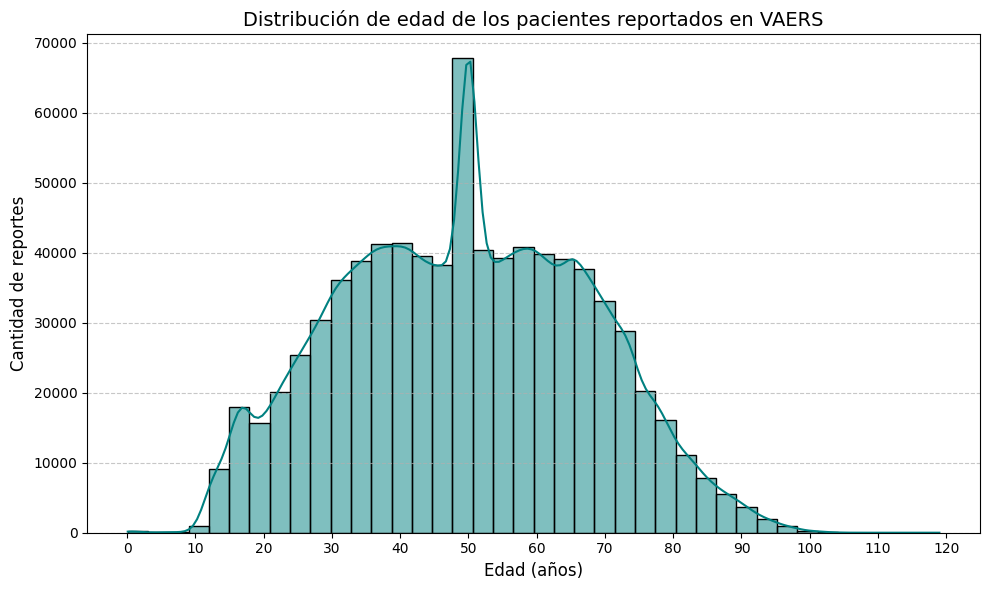

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['AGE_YRS'], bins=40, kde=True, color='teal')
plt.title('Distribuci√≥n de edad de los pacientes reportados en VAERS', fontsize=14)
plt.xlabel('Edad (a√±os)', fontsize=12)
plt.ylabel('Cantidad de reportes', fontsize=12)
plt.xticks(range(0, int(df['AGE_YRS'].max())+10, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### **7.2 Gr√°fico de Frecuencia de eventos adversos por sexo (SEX)**

**Objetivo:** Comparar distribuci√≥n de reportes entre g√©neros.

La variable SEX permite identificar posibles diferencias en la frecuencia de notificaci√≥n entre g√©neros, lo cual puede estar influenciado por factores biol√≥gicos, conductuales o sociales. Esta visualizaci√≥n es clave para detectar sesgos de reporte y orientar futuros an√°lisis hacia grupos poblacionales con mayor carga de eventos registrados.

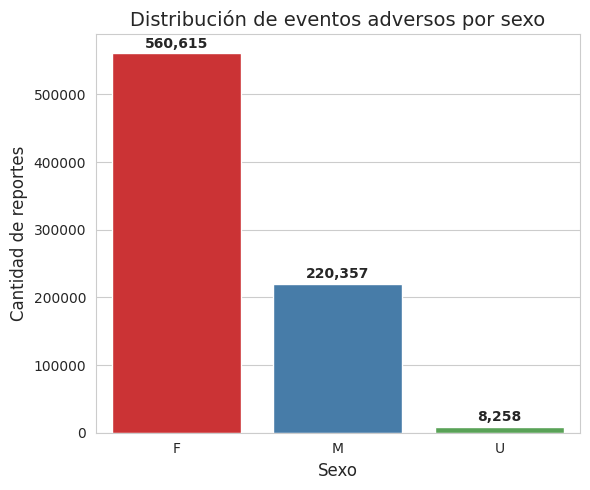

In [ ]:
# Configuraci√≥n del gr√°fico
plt.figure(figsize=(6,5))
sns.set_style("whitegrid")

# Crear gr√°fico de barras ordenado por frecuencia
ax = sns.countplot(x='SEX', data=df, palette='Set1', order=df['SEX'].value_counts().index)

# T√≠tulo y etiquetas
plt.title('Distribuci√≥n de eventos adversos por sexo', fontsize=14)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Cantidad de reportes', fontsize=12)

# Agregar etiquetas num√©ricas sobre cada barra
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height:,}',  # separador de miles
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 2),  # desplazamiento vertical
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()



### **7.3 Gr√°fico de Reportes de Eventos adversos por fabricante de vacuna (VAX_MANU)**

**Objetivo:**  identificar qu√© laboratorios concentran mayor volumen de notificaciones dentro del sistema VAERS, lo cual puede reflejar tanto su participaci√≥n en campa√±as de vacunaci√≥n como posibles diferencias en perfiles de reacto-genicidad o en el comportamiento de reportes.

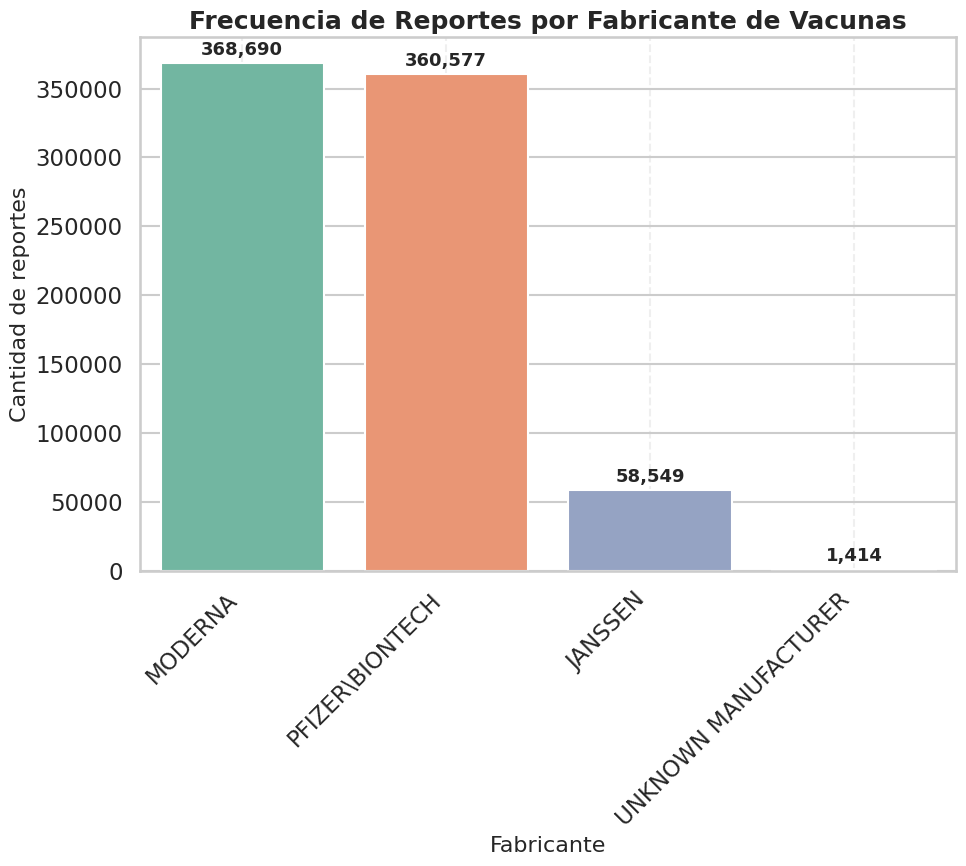

In [ ]:
# Estilo visual
sns.set_style("whitegrid")
sns.set_context("talk")

# Obtener los 10 fabricantes con m√°s reportes
top_manus = df['VAX_MANU'].value_counts().nlargest(10)
fabricantes = top_manus.index
reportes = top_manus.values

# Crear gr√°fico de barras verticales con paleta contrastante
plt.figure(figsize=(10, 9))
palette = sns.color_palette("Set2", n_colors=len(fabricantes))
ax = sns.barplot(x=fabricantes, y=reportes, palette=palette)

# T√≠tulo y etiquetas
plt.title("Frecuencia de Reportes por Fabricante de Vacunas", fontsize=18, weight='bold')
plt.xlabel("Fabricante", fontsize=16)
plt.ylabel("Cantidad de reportes", fontsize=16)

# Etiquetas num√©ricas sobre cada barra
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height:,}',  # separador de miles
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=13, fontweight='bold')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### **7.4 Gr√°fico 4: Cantidad de reportes registrados en la base de datos por Mes/A√±o**

Este gr√°fico muestra la evoluci√≥n mensual de los reportes de eventos adversos registrados en el website VAERS durante el per√≠odo disponible en el dataset.

**Objetivo:**  identificar patrones temporales en la frecuencia de registro, lo cual puede reflejar el impacto de campa√±as de vacunaci√≥n, cambios en la cobertura poblacional o variaciones en el comportamiento de reporte. Esta visualizaci√≥n permite contextualizar los hallazgos descriptivos previos y detectar posibles picos de inter√©s epidemiol√≥gico.

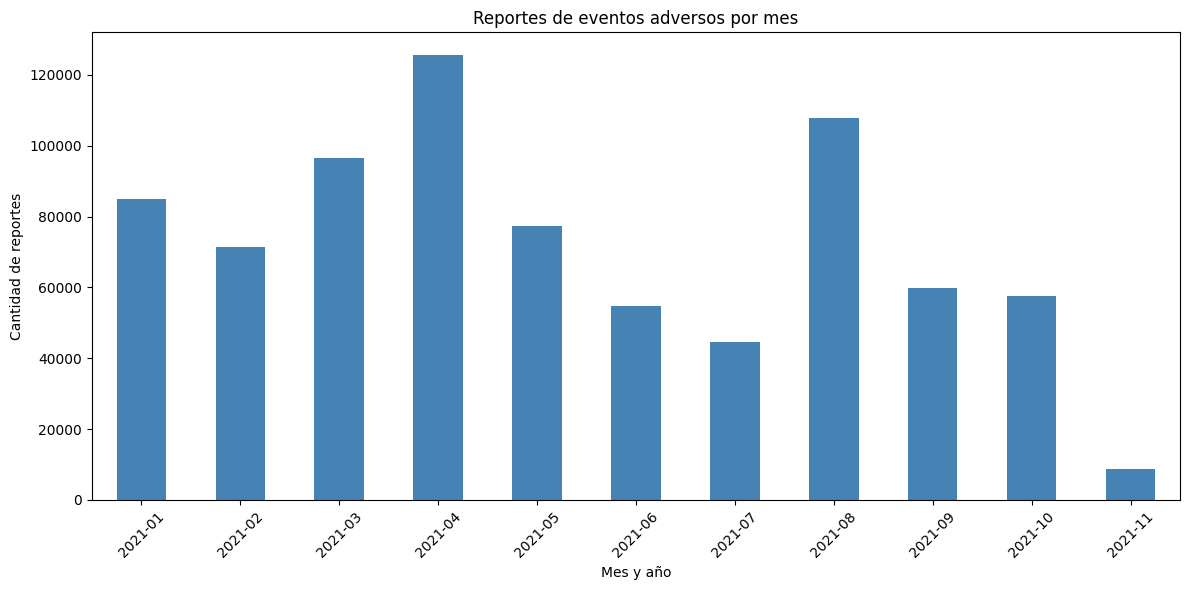

In [ ]:
df['RECVDATE'] = pd.to_datetime(df['RECVDATE'], errors='coerce')
df['mes_a√±o'] = df['RECVDATE'].dt.to_period('M')
reportes_mensuales = df['mes_a√±o'].value_counts().sort_index()

# Gr√°fico
plt.figure(figsize=(12,6))
reportes_mensuales.plot(kind='bar', color='steelblue')
plt.title('Reportes de eventos adversos por mes')
plt.xlabel('Mes y a√±o')
plt.ylabel('Cantidad de reportes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Verificaci√≥n del rango de la variable RECVDATE
print(df['RECVDATE'].min())
print(df['RECVDATE'].max())


2021-01-01 00:00:00
2021-11-05 00:00:00


### **7.5 Gr√°fico 5: Proporci√≥n de eventos adversos graves (EAG) registrados por mes**

Este gr√°fico muestra la proporci√≥n mensual de registros que implican eventos adversos graves, espec√≠ficamente fallecimiento (DIED) y hospitalizaci√≥n (HOSPITAL).

**Objetivo:** observar c√≥mo var√≠a la frecuencia relativa de los reportes de eventos adversos graves dentro del sistema VAERS a lo largo del tiempo. Dado que los datos provienen de registros voluntarios, esta visualizaci√≥n permite explorar la din√°mica del reporte y detectar posibles cambios en el comportamiento de notificaci√≥n, sin asumir veracidad cl√≠nica ni representatividad poblacional.

<Figure size 1000x500 with 0 Axes>

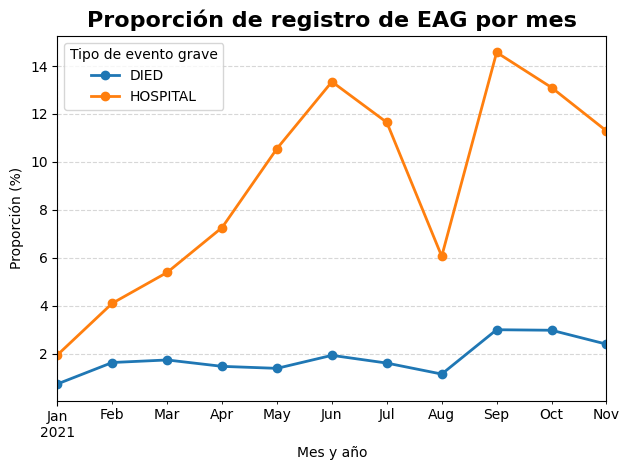

In [ ]:
# Asegurar formato de fecha
df['RECVDATE'] = pd.to_datetime(df['RECVDATE'], errors='coerce')
df['mes_a√±o'] = df['RECVDATE'].dt.to_period('M')

# Calcular proporciones mensuales
graves = ['DIED', 'HOSPITAL']
proporciones = {}

for evento in graves:
    proporciones[evento] = (
        df[df[evento] == 'Y'].groupby('mes_a√±o').size() /
        df.groupby('mes_a√±o').size()
    ) * 100

# Crear DataFrame para graficar
df_proporciones = pd.DataFrame(proporciones).sort_index()

# Gr√°fico
plt.figure(figsize=(10,5))
df_proporciones.plot(marker='o', linewidth=2)
plt.title('Proporci√≥n de registro de EAG por mes', fontsize=16, weight='bold')
plt.xlabel('Mes y a√±o')
plt.ylabel('Proporci√≥n (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Tipo de evento grave')
plt.tight_layout()
plt.show()




## 7.6 Hallazgos Inicialesüí°

**1. Distribuci√≥n de edad de los pacientes reportados:**

El histograma revela una **concentraci√≥n marcada de reportes en adultos de mediana edad, con un pico alrededor de los 50 a√±os.** La forma de la distribuci√≥n sugiere que los eventos adversos se reportan con mayor frecuencia en este grupo etario, lo que podr√≠a estar relacionado con patrones de vacunaci√≥n, mayor vigilancia cl√≠nica o una mayor propensi√≥n a reportar. La baja frecuencia en extremos etarios tambi√©n plantea preguntas sobre subregistro o menor exposici√≥n.

**2. Frecuencia de eventos adversos por sexo:**

El gr√°fico muestra una diferencia significativa entre g√©neros: **las mujeres representan m√°s del doble de reportes que los hombres.** Este sesgo puede reflejar factores biol√≥gicos (como diferencias inmunol√≥gicas), sociales (mayor disposici√≥n a reportar) o epidemiol√≥gicos (mayor cobertura vacunal en ciertos grupos). La categor√≠a "desconocido" es marginal pero relevante para evaluar la calidad del dato.

**3. Eventos adversos por fabricante de vacuna:**

**MODERNA y PFIZER/BIONTECH concentran la mayor√≠a de los reportes, seguidos por JANSSEN.** Este patr√≥n puede estar influenciado por la distribuci√≥n de dosis en campa√±as de vacunaci√≥n, pero tambi√©n podr√≠a reflejar diferencias en reactogenicidad, perfil de seguridad o percepci√≥n p√∫blica. La categor√≠a "unknown MANUFACTURER" con baja frecuencia, sugiere inconsistencias en el registro o falta de especificaci√≥n.

**4. Cantidad de Reportes Registrados en la Base de Datos por Mes/A√±o**

Observando las fechas de mes-a√±o de las barras obtenidas en este gr√°fico, podemos notar que seg√∫n el dataset post-limpieza, la variable RECVDATE solo contiene **registros entre enero y noviembre del a√±o 2021.** Esto puede deberse a:

- El recorte temporal del archivo original descargado.

- Filtros aplicados durante la limpieza (por ejemplo, eliminaci√≥n de registros sin fecha v√°lida).

- Que el sistema VAERS haya tenido mayor volumen de carga en ese per√≠odo.

**5. Proporci√≥n de Eventos Adversos Graves registrados por mes.**

El gr√°fico revela que, aunque la proporci√≥n de reportes con fallecimiento (DIED) se mantiene relativamente estable en torno al 2% durante todo el per√≠odo, la proporci√≥n de reportes con hospitalizaci√≥n (HOSPITAL) muestra una variaci√≥n m√°s marcada. Se observa un incremento sostenido desde enero hasta un pico en junio (~ 14%), seguido de una disminuci√≥n progresiva hasta agosto (~ 6%), y un nuevo pico alrededor de los meses de Septiembre-Octubre.

Este comportamiento sugiere una din√°mica cambiante en el registro de eventos graves, posiblemente influida por factores como la evoluci√≥n de la campa√±a de vacunaci√≥n, la percepci√≥n p√∫blica del riesgo, o cambios en el comportamiento de notificaci√≥n. Dado que los datos provienen de reportes voluntarios, esta visualizaci√≥n no permite inferir la severidad cl√≠nica real, pero s√≠ aporta informaci√≥n valiosa sobre la variabilidad en la carga relativa de eventos graves reportados a lo largo del tiempo.

# 8. Elecci√≥n del Modelo de Machine Learning üñ•Ô∏è
 Modelo de Aprendizaje Autom√°tico Supervisado - Limitaciones del Dataset



Dado que el objetivo principal del trabajo es evaluar la seguridad de las vacunas a partir de reportes de eventos adversos, con especial √©nfasis en desenlaces graves, se opta por aplicar t√©cnicas de **aprendizaje supervisado**. Este enfoque permite construir **modelos de clasificaci√≥n** que estimen la probabilidad de ocurrencia de eventos graves en funci√≥n de variables observadas como edad, sexo, fabricante, tipo de vacuna y s√≠ntomas reportados.

En este contexto, se define como variable objetivo (target) aquella que indica la presencia de hospitalizaci√≥n asociada al evento adverso reportado post-vacunaci√≥n:

- **HOSPITAL**: hospitalizaci√≥n asociada al evento de vacunaci√≥n (problema de clasificaci√≥n binaria: S√≠/No)

Se trabajar√° con un modelo de aprendizaje autom√°tico supervisado, utilizando algoritmos de clasificaci√≥n apropiados para predecir la hospitalizaci√≥n.

**Elecci√≥n del Modelo: Regresi√≥n Log√≠stica**

Para abordar este problema de clasificaci√≥n binaria, la **Regresi√≥n Log√≠stica** es una elecci√≥n adecuada y un excelente punto de partida. Sus ventajas incluyen:

1.  **Interpretabilidad:** Permite entender la influencia de cada caracter√≠stica (variables predictoras) en la probabilidad de que ocurra la hospitalizaci√≥n. Los coeficientes del modelo indican la direcci√≥n y magnitud de esta relaci√≥n.
2.  **Eficiencia Computacional:** Es relativamente r√°pida de entrenar y predecir, incluso con grandes conjuntos de datos como este.
3.  **Buena L√≠nea Base:** Proporciona una referencia s√≥lida para comparar el rendimiento con modelos m√°s complejos.

Alternativamente, un **Random Forest Classifier** podr√≠a ofrecer mayor precisi√≥n al capturar interacciones complejas entre variables, aunque a costa de una menor interpretabilidad directa. Dada la necesidad de entender los factores asociados a la hospitalizaci√≥n, la Regresi√≥n Log√≠stica es una opci√≥n transparente para un an√°lisis inicial.

Las variables DIED (fallecimiento) y DISABLE (discapacidad) fueron excluidas como variables objetivo por diversas razones, incluyendo la posibilidad de representar condiciones preexistentes no necesariamente atribuibles directamente al evento adverso post-vacunal reportado, y para simplificar el enfoque del modelado a un √∫nico desenlace grave: la hospitalizaci√≥n.

El **aprendizaje supervisado (clasificaci√≥n)** facilita:

- La identificaci√≥n de patrones en los datos reportados asociados a mayor riesgo de hospitalizaci√≥n.
- La evaluaci√≥n del poder explicativo de cada variable independiente para predecir este desenlace.
- La generaci√≥n de m√©tricas de desempe√±o (precisi√≥n, recall, F1-score, AUC, etc.) que permiten validar y comparar los modelos de clasificaci√≥n.

## **üö®8.1 Limitaciones del Dataset**üöß

Es importante destacar que el sistema VAERS se basa en reportes voluntarios de personas por medio de un sitio web, lo que implica varias limitaciones:

- **Subregistro:** no todos los eventos adversos son reportados.

- **Sesgo de notificaci√≥n:** ciertos grupos o tipos de eventos pueden reportarse con mayor frecuencia.

- **Falta de verificaci√≥n cl√≠nica:** los reportes no siempre est√°n validados por profesionales de salud, y los datos pueden no ser cl√≠nicamente confirmados.

- **Datos incompletos o inconsistentes:** algunas variables presentan valores faltantes, errores de entrada o ambig√ºedades.

Por lo tanto, los modelos construidos no deben interpretarse como estimaciones de riesgo cl√≠nico absoluto o causalidad, sino como herramientas exploratorias para detectar patrones en el comportamiento de reporte dentro del sistema VAERS y generar hip√≥tesis para estudios cl√≠nicos o epidemiol√≥gicos posteriores.

En una segunda etapa, se podr√≠a complementar el an√°lisis con t√©cnicas de aprendizaje no supervisado (como clustering) para explorar subgrupos de pacientes que hayan reportado perfiles sintom√°ticos similares o identificar patrones inesperados en los datos.

# 9. ü§ñ Modelo de Aprendizaje Autom√°tico Supervisado (Regresi√≥n Log√≠stica) para la variable target HOSPITAL.

### **1. Verificar el tipo de Dato**

Se verifica que no haya variables categ√≥ricas etiquetadas como num√©ricas o viceversa.

In [ ]:
# Verificar los tipos de datos actuales
tipos_actuales = df.dtypes.to_dict()
print("Tipos de datos actuales:")
for col, dtype in tipos_actuales.items():
    print(f"- {col}: {dtype}")

# Separar columnas por tipo de dato (considerando 'object' como categ√≥rica)
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nVariables categ√≥ricas:")
print(cat_cols)

print("\nVariables num√©ricas:")
print(num_cols)

Tipos de datos actuales:
- VAERS_ID: int64
- SYMPTOM1: object
- SYMPTOMVERSION1: float64
- SYMPTOM2: object
- SYMPTOMVERSION2: object
- SYMPTOM3: object
- SYMPTOMVERSION3: object
- SYMPTOM4: object
- SYMPTOMVERSION4: object
- SYMPTOM5: object
- SYMPTOMVERSION5: object
- VAX_TYPE: object
- VAX_MANU: object
- VAX_DOSE_SERIES: object
- VAX_NAME: object
- RECVDATE: object
- STATE: object
- AGE_YRS: float64
- SEX: object
- SYMPTOM_TEXT: object
- DIED: object
- L_THREAT: object
- HOSPITAL: object
- HOSPDAYS: float64
- DISABLE: object
- RECOVD: object
- VAX_DATE: object
- ONSET_DATE: object
- NUMDAYS: float64
- LAB_DATA: object
- V_ADMINBY: object
- OTHER_MEDS: object
- CUR_ILL: object
- HISTORY: object
- FORM_VERS: int64
- OFC_VISIT: object
- ER_ED_VISIT: object
- ALLERGIES: object

Variables categ√≥ricas:
['SYMPTOM1', 'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'VAX_TYPE', 'VAX_MANU', 'VAX_DOSE_SERIES', 'VAX_NAM

Correcciones a realizar:
- La variable SYMPTOMVERSION1 es categ√≥rica no num√©rica (versi√≥n del formulario vears),
- Luego VAX_DOSE_SERIES (n√∫mero de dosis de la vacuna administrada) y es numerica y est√° clasificada como categ√≥rica ("object").
- Finalmente ONSET_DAY, al igual que VAX_DATE y RECVDATE son fechas.

In [ ]:
# Verify current data types
print("Current data types before correction:")
print(df.dtypes)

# Correct data types based on user feedback
df['SYMPTOMVERSION1'] = df['SYMPTOMVERSION1'].astype(str) # Treat as categorical
df['VAX_DOSE_SERIES'] = pd.to_numeric(df['VAX_DOSE_SERIES'], errors='coerce') # Convert to numeric, coerce errors
df['ONSET_DATE'] = pd.to_datetime(df['ONSET_DATE'], errors='coerce') # Convert to datetime
df['VAX_DATE'] = pd.to_datetime(df['VAX_DATE'], errors='coerce') # Convert to datetime
df['RECVDATE'] = pd.to_datetime(df['RECVDATE'], errors='coerce') # Convert to datetime


# Re-verify data types
print("\nCurrent data types after correction:")
print(df.dtypes)

# Separate columns by data type
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
date_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print("\nCategorical variables:")
print(cat_cols)

print("\nNumerical variables:")
print(num_cols)

print("\nDate variables:")
print(date_cols)

Current data types before correction:
VAERS_ID             int64
SYMPTOM1            object
SYMPTOMVERSION1    float64
SYMPTOM2            object
SYMPTOMVERSION2     object
SYMPTOM3            object
SYMPTOMVERSION3     object
SYMPTOM4            object
SYMPTOMVERSION4     object
SYMPTOM5            object
SYMPTOMVERSION5     object
VAX_TYPE            object
VAX_MANU            object
VAX_DOSE_SERIES     object
VAX_NAME            object
RECVDATE            object
STATE               object
AGE_YRS            float64
SEX                 object
SYMPTOM_TEXT        object
DIED                object
L_THREAT            object
HOSPITAL            object
HOSPDAYS           float64
DISABLE             object
RECOVD              object
VAX_DATE            object
ONSET_DATE          object
NUMDAYS            float64
LAB_DATA            object
V_ADMINBY           object
OTHER_MEDS          object
CUR_ILL             object
HISTORY             object
FORM_VERS            int64
OFC_VISIT        

### **2. Seleccionar las caracter√≠sticas (features) y la variable objetivo (target)**

Se define qu√© columnas se usar√°n como predictores (X) y cu√°l es la variable a predecir (En base al objetivo y - 'HOSPITAL').

Para las caracter√≠sticas (x), se incluyen solo las columnas identificadas como num√©ricas o categ√≥ricas, **excluyendo las columnas de fecha** por ahora, ya que requieren un tratamiento espec√≠fico si se van a usar como features. Se excluye a la variable 'VAERS_ID' ya que es solo un identificador.

In [ ]:
# Definir la variable objetivo (y)
y = df['HOSPITAL']

# Definir las caracter√≠sticas (X)
# Excluimos 'HOSPITAL' (la variable objetivo), 'VAERS_ID' (identificador),
# y las columnas de fecha por ahora, ya que requieren un tratamiento espec√≠fico si se van a usar como features.
X = df.drop(columns=['HOSPITAL', 'VAERS_ID'] + date_cols)

print("Variable objetivo (y) definida.")
print("Primeros 5 valores de y:")
print(y.head())

print("\nCaracter√≠sticas (X) definidas.")
print("Primeras 5 filas de X:")
display(X.head())

print("\nColumnas en X:")
print(X.columns.tolist())

Variable objetivo (y) definida.
Primeros 5 valores de y:
0    No Hospitalization
1    No Hospitalization
2    No Hospitalization
3    No Hospitalization
4    No Hospitalization
Name: HOSPITAL, dtype: object

Caracter√≠sticas (X) definidas.
Primeras 5 filas de X:


SYMPTOM1 SYMPTOMVERSION1                 SYMPTOM2  \
0                Dysphagia            23.1             Epiglottitis   
1                  Anxiety            23.1                 Dyspnoea   
2         Chest discomfort            23.1                Dysphagia   
3                Dizziness            23.1                  Fatigue   
4  Injection site erythema            23.1  Injection site pruritus   

  SYMPTOMVERSION2                  SYMPTOM3           SYMPTOMVERSION3  \
0            23.1  Sin s√≠ntomas adicionales  Sin s√≠ntomas adicionales   
1            23.1  Sin s√≠ntomas adicionales  Sin s√≠ntomas adicionales   
2            23.1         Pain in extremity                      23.1   
3            23.1        Mobility decreased                      23.1   
4            23.1   Injection site swelling                      23.1   

                   SYMPTOM4           SYMPTOMVERSION4  \
0  Sin s√≠ntomas adicionales  Sin s√≠ntomas adicionales   
1  Sin s√≠ntomas adicionales  Sin s√≠ntomas adicionales   
2         Visual impairment                      23.1   
3  Sin s√≠ntomas adicionales  Sin s√≠ntomas adicionales   
4     Injection site warmth                      23.1   

                   SYMPTOM5           SYMPTOMVERSION5  ... NUMDAYS  \
0  Sin s√≠ntomas adicionales  Sin s√≠ntomas adicionales  ...     2.0   
1  Sin s√≠ntomas adicionales  Sin s√≠ntomas adicionales  ...     0.0   
2  Sin s√≠ntomas adicionales  Sin s√≠ntomas adicionales  ...     0.0   
3  Sin s√≠ntomas adicionales  Sin s√≠ntomas adicionales  ...     0.0   
4  Sin s√≠ntomas adicionales  Sin s√≠ntomas adicionales  ...     7.0   

                        LAB_DATA  V_ADMINBY  \
0  No se proporcion√≥ informaci√≥n        PVT   
1  No se proporcion√≥ informaci√≥n        SEN   
2  No se proporcion√≥ informaci√≥n        SEN   
3                           none        WRK   
4  No se proporcion√≥ informaci√≥n        PUB   

                                          OTHER_MEDS  \
0                      No se proporcion√≥ informaci√≥n   
1  Patient residing at nursing facility. See pati...   
2                      No se proporcion√≥ informaci√≥n   
3                                               none   
4                                                 Na   

                                             CUR_ILL  \
0                      No se proporcion√≥ informaci√≥n   
1  Patient residing at nursing facility. See pati...   
2                      No se proporcion√≥ informaci√≥n   
3                                   kidney infection   
4                                                 Na   

                                             HISTORY FORM_VERS  \
0                      No se proporcion√≥ informaci√≥n         2   
1  Patient residing at nursing facility. See pati...         2   
2                      No se proporcion√≥ informaci√≥n         2   
3  diverticulitis, mitral valve prolapse, osteoar...         2   
4                      No se proporcion√≥ informaci√≥n         2   

             OFC_VISIT          ER_ED_VISIT  \
0                    Y  No ocurrio/No posee   
1                    Y  No ocurrio/No posee   
2  No ocurrio/No posee                    Y   
3  No ocurrio/No posee  No ocurrio/No posee   
4  No ocurrio/No posee  No ocurrio/No posee   

                                           ALLERGIES  
0                                  Pcn and bee venom  
1                                            "Dairy"  
2                                          Shellfish  
3  Diclofenac, novacaine, lidocaine, pickles, tom...  
4                                                 Na  

[5 rows x 33 columns]


Columnas en X:
['SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'VAX_TYPE', 'VAX_MANU', 'VAX_DOSE_SERIES', 'VAX_NAME', 'STATE', 'AGE_YRS', 'SEX', 'SYMPTOM_TEXT', 'DIED', 'L_THREAT', 'HOSPDAYS', 'DISABLE', 'RECOVD', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'FORM_VERS', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES']


### **3. An√°lisis de Cardinalidad de Variables Categ√≥ricas**

El manejo de variables con alta cardinalidad puede ser un desaf√≠o para el modelo de Machine Learning de Regresi√≥n Log√≠stica, y podr√≠a requerir considerar pasos posteriores de selecci√≥n de caracter√≠sticas o reducci√≥n de la dimensionalidad.

Considerando esta problem√°tica, decid√≠ evaluar en esta primera instancia, la importancia de las variables con m√°s alta cardinalidad en relaci√≥n con los objetivos planteados en este trabajo.

In [ ]:
# Seleccionar solo las columnas de tipo 'object' (categ√≥ricas) del DataFrame X
cat_cols_X = X.select_dtypes(include='object').columns

# Calcular la cardinalidad (n√∫mero de valores √∫nicos) para cada columna categ√≥rica
cardinalidad_X = X[cat_cols_X].nunique().sort_values(ascending=False)

print("Cardinalidad de las variables categ√≥ricas en X (antes de One-Hot Encoding):")
print(cardinalidad_X.head(15))

Cardinalidad de las variables categ√≥ricas en X (antes de One-Hot Encoding):
SYMPTOM_TEXT       534800
OTHER_MEDS         231859
HISTORY            155265
LAB_DATA           133310
ALLERGIES          107123
CUR_ILL             51655
SYMPTOM1             6843
SYMPTOM2             6531
SYMPTOM3             6132
SYMPTOM4             5547
SYMPTOM5             5163
STATE                  64
V_ADMINBY               9
VAX_NAME                4
SYMPTOMVERSION5         4
dtype: int64


Considerando las siguientes variables con m√°s alta cardinalidad y su impacto sobre la variable de objetivo (target: y- HOSPITAL (hospitalizado)):

- SYMPTOM_TEXT .... 534800
- OTHER_MEDS.......... 231859
- HISTORY.................... 155265
- LAB_DATA............... 133310
- ALLERGIES................ 107123
- CUR_ILL.................... 51655

Decido eliminar:
- La variable SYMPTOM_TEXT, ya que son s√≠ntomas reportados en formato texto, con demasiadas categor√≠as √∫nicas de baja frecuencia.
- La variable LAB_DATA, ya que se trata de datos del laboratorio de diagn√≥stico, los cuales tambi√©n son datos muy espec√≠ficos para cada paciente, con muchas categor√≠as √∫nicas de baja frecuencia, que considero que no aportar√°n informaci√≥n sustancial al presente an√°lisis. Considerando a su vez, que el modelo eligido de regresi√≥n log√≠stica no es un modelo matem√°ticamente tan complejo como para poder interpretar correctamente esta informaci√≥n.  
- La variable CUR_ILL ya que es texto libre que describe la portaci√≥n de enferedades al momento de la vacunaci√≥n, y se puede considerar redundante con la variable HISTORY que describe la existencia de enfermedades cr√≥nicas o de largo plazo al momento de la vacunaci√≥n.

Finalmente, las variables: OTHER_MEDS (otros medicamentos consumidos durante el per√≠odo de vacunaci√≥n), HISTORY (enfermedades cr√≥nicas o de largo plazo pre-existentes), y ALLERGIES (alergias) considero que aportan informaci√≥n valiosa, que ser√≠a interesante poder considerar para evular su impacto en la gravedad del estado del paciente post-vacunaci√≥n (hospitalizado o no) por lo que decido mantenerlas, en primera instancia, pese a su elevada cardinalidad.


In [ ]:
# Eliminar las columnas SYMPTOM_TEXT y LAB_DATA de X
columnas_a_eliminar_cardinalidad = ['SYMPTOM_TEXT', 'LAB_DATA']
X = X.drop(columns=columnas_a_eliminar_cardinalidad)

print(f"Columnas '{', '.join(columnas_a_eliminar_cardinalidad)}' eliminadas de X.")
print("\nColumnas restantes en X:")
print(X.columns.tolist())

Columnas 'SYMPTOM_TEXT, LAB_DATA' eliminadas de X.

Columnas restantes en X:
['SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'VAX_TYPE', 'VAX_MANU', 'VAX_DOSE_SERIES', 'VAX_NAME', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'L_THREAT', 'HOSPDAYS', 'DISABLE', 'RECOVD', 'NUMDAYS', 'V_ADMINBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'FORM_VERS', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES']


In [ ]:
# Eliminar la columna CUR_ILL de X
columnas_a_eliminar_adicional = ['CUR_ILL']
X = X.drop(columns=columnas_a_eliminar_adicional)

print(f"Columna '{', '.join(columnas_a_eliminar_adicional)}' eliminada de X.")
print("\nColumnas restantes en X:")
print(X.columns.tolist())

Columna 'CUR_ILL' eliminada de X.

Columnas restantes en X:
['SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'VAX_TYPE', 'VAX_MANU', 'VAX_DOSE_SERIES', 'VAX_NAME', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'L_THREAT', 'HOSPDAYS', 'DISABLE', 'RECOVD', 'NUMDAYS', 'V_ADMINBY', 'OTHER_MEDS', 'HISTORY', 'FORM_VERS', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES']


Luego, decid√≠ continuar con la reducci√≥n del n√∫mero de columnas antes de aplicar el One-Hot Encoding, ya que en caso contrario, al intentar avanzar desde este punto, los c√≥digos siguientes no se ejecutaron por alcanzar el m√°ximo de la memoria RAM disponible, tanto en este entorno como en un entorno local (jupyter notebook).

Por lo tanto, decid√≠ eliminar las categor√≠as menos frecuentes en las variables con alta cardinalidad, y dejar solo las 50 categor√≠as con mayor frecuencia.

In [ ]:
# Identificar las columnas categ√≥ricas en X (excluyendo las que ya se eliminaron por cardinalidad extrema)
cat_cols_X = X.select_dtypes(include='object').columns.tolist()

# Definir el n√∫mero m√°ximo de categor√≠as a mantener
max_categories = 50

# Aplicar la reducci√≥n de cardinalidad
for col in cat_cols_X:
    # Obtener las categor√≠as m√°s frecuentes
    top_categories = X[col].value_counts().nlargest(max_categories).index.tolist()
    # Reemplazar las categor√≠as menos frecuentes por 'Other'
    X[col] = X[col].apply(lambda x: x if x in top_categories else 'Other')

print(f"Cardinalidad de las variables categ√≥ricas en X despu√©s de la reducci√≥n (m√°ximo {max_categories} categor√≠as):")
# Recalcular y mostrar la cardinalidad de las columnas categ√≥ricas reducidas
cat_cols_X_reduced = X.select_dtypes(include='object').columns
cardinalidad_X_reduced = X[cat_cols_X_reduced].nunique().sort_values(ascending=False)
print(cardinalidad_X_reduced.head(15))

Cardinalidad de las variables categ√≥ricas en X despu√©s de la reducci√≥n (m√°ximo 50 categor√≠as):
SYMPTOM1           51
SYMPTOM2           51
SYMPTOM3           51
SYMPTOM5           51
SYMPTOM4           51
OTHER_MEDS         51
HISTORY            51
ALLERGIES          51
STATE              51
V_ADMINBY           9
SYMPTOMVERSION4     4
SYMPTOMVERSION2     4
SYMPTOMVERSION3     4
VAX_NAME            4
SYMPTOMVERSION5     4
dtype: int64


### 3.1 Gr√°fico de Cardinalidad de variables categ√≥ricas

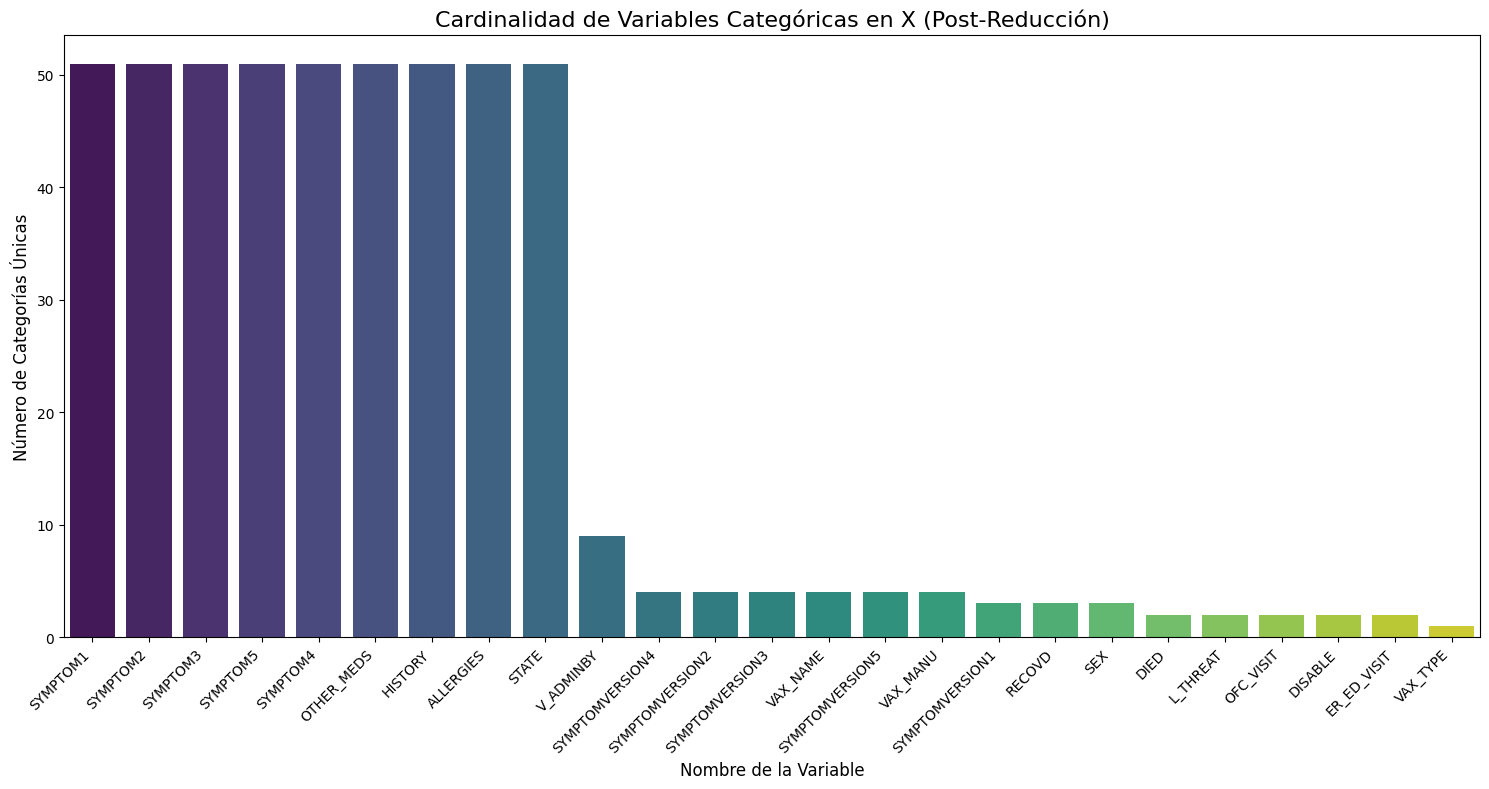

La suma total de categor√≠as en X (Post-Reducci√≥n) es: 512


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumimos que 'X' es tu DataFrame despu√©s de la limpieza, extracci√≥n manual de features
# y reducci√≥n de cardinalidad de las variables categ√≥ricas
# Selecciona solo las columnas que son de tipo 'object' o 'category' en X
columnas_categoricas_X = X.select_dtypes(include=['object', 'category']).columns

# Define las columnas a excluir (aunque ya no est√©n en X, para claridad)
columnas_a_excluir = ['SYMPTOM_TEXT', 'LAB_DATA', 'CUR_ILL']

# Filtra las columnas categ√≥ricas_X para excluir las que no deben estar en el gr√°fico
columnas_categoricas_para_graficar = [col for col in columnas_categoricas_X if col not in columnas_a_excluir]

# Calcula la cardinalidad (n√∫mero de valores √∫nicos) de cada una en X, solo para las columnas a graficar
cardinalidad_X = X[columnas_categoricas_para_graficar].nunique().sort_values(ascending=False)

# Grafica los resultados
plt.figure(figsize=(15, 8))
sns.barplot(x=cardinalidad_X.index, y=cardinalidad_X.values, palette='viridis')
plt.title('Cardinalidad de Variables Categ√≥ricas en X (Post-Reducci√≥n)', fontsize=16)
plt.ylabel('N√∫mero de Categor√≠as √önicas', fontsize=12)
plt.xlabel('Nombre de la Variable', fontsize=12)
plt.xticks(rotation=45, ha="right") # Rota las etiquetas para que no se superpongan
plt.tight_layout() # Ajusta el gr√°fico para que todo quepa
plt.show()

print(f"La suma total de categor√≠as en X (Post-Reducci√≥n) es: {cardinalidad_X.sum()}")

Como se observa en el Gr√°fico de cardinalidad de variables categ√≥ricas, pese a los pasos de reducci√≥n de la dimensionalidad aplicados anteriormente, el n√∫mero tan alto de categor√≠as en X a codificar (500) se puede deber a que Variables como **OTHER_MEDS**, **HISTORY** , **ALLERGIES**, o **STATE** son de texto libre. Si se incluyen en el c√°lculo de cardinalidad para One-Hot Encoding, cada una podr√≠a tener cientos de valores √∫nicos, inflando demasiado el total de categor√≠as.

Por este motivo, opt√© por aplicar una extracci√≥n manual de caracter√≠sticas de inter√©s para estas variables.

### 3.2 Extracci√≥n Manual de Caracter√≠sticas para variables categ√≥ricas de texto libre.

La informaci√≥n que decid√≠ extraer para cada variable fue:

- **HISTORY** (historial de enfermedades cr√≥nicas o de largo plazo): si tiene diabetes, asma o enfermedades card√≠acas.
- **OTHER_MEDS** (otros medicamentos): si toma aspirina, ibuprofeno, estatinas o metformina (medicaciones comunes y potencialmente peligrosas en combinaci√≥n con otros medicamentos).
- **ALLERGIES** (alergias): alergia al man√≠ (peanuts), alergia a los mariscos (shellfish), alergia a la penicilina, alergia a sulfabactrim (antibi√≥tico de uso com√∫n).
- **STATE**: decid√≠ conservar solo las 10 categor√≠as m√°s frecuentes.

In [ ]:
# --- Manual Feature Extraction and Cardinality Reduction ---

# Use the DataFrame X which still contains the text and categorical columns
# Fill potential NaN values and convert to lowercase for robust matching
# Using .astype(str) to prevent errors on non-string data
X['HISTORY_lower'] = X['HISTORY'].astype(str).str.lower().fillna('')
X['OTHER_MEDS_lower'] = X['OTHER_MEDS'].astype(str).str.lower().fillna('')
X['ALLERGIES_lower'] = X['ALLERGIES'].astype(str).str.lower().fillna('')

# --- Create features from the 'HISTORY' column ---
history_keywords = {
    'history_has_diabetes': 'diabet',
    'history_has_asthma': 'asthma',
    'history_has_cardiac_issues': 'cardiac|heart|hypertens'
}
for col_name, keyword in history_keywords.items():
    X[col_name] = X['HISTORY_lower'].str.contains(keyword).astype(int)

# --- Create features from the 'OTHER_MEDS' column ---
meds_keywords = {
    'takes_aspirin': 'aspirin|aas',
    'takes_ibuprofen': 'ibuprofen|motrin|advil',
    'takes_statins': 'statin|lipitor|crestor',
    'takes_metformin': 'metformin'
}
for col_name, keyword in meds_keywords.items():
    X[col_name] = X['OTHER_MEDS_lower'].str.contains(keyword).astype(int)

# --- Create features from the 'ALLERGIES' column ---
allergy_keywords = {
    'allergy_to_penicillin': 'penicillin',
    'allergy_to_sulfa': 'sulfa|bactrim',
    'allergy_to_peanuts': 'peanut',
    'allergy_to_shellfish': 'shellfish|shrimp'
}
for col_name, keyword in allergy_keywords.items():
    X[col_name] = X['ALLERGIES_lower'].str.contains(keyword).astype(int)

# --- Reduce Cardinality for 'STATE' column ---
# Find the 10 most frequent states
top_10_states = X['STATE'].value_counts().nlargest(10).index
# Group all other states into an 'OTHER' category in a new column
X['STATE_grouped'] = np.where(X['STATE'].isin(top_10_states), X['STATE'], 'OTHER')


# --- Clean up and review ---
# Drop the original text/high-cardinality columns and temporary lowercase columns from X
X = X.drop(columns=[
    'HISTORY', 'OTHER_MEDS', 'ALLERGIES', 'STATE',
    'HISTORY_lower', 'OTHER_MEDS_lower', 'ALLERGIES_lower'
])

# Display the first few rows of X with the new features
print("DataFrame X with new features and reduced cardinality:")
display(X.head())

# Check the new dimensions and data types of X
print("\nNew DataFrame X info:")
X.info()

DataFrame X with new features and reduced cardinality:


SYMPTOM1 SYMPTOMVERSION1                 SYMPTOM2  \
0                    Other            23.1                    Other   
1                  Anxiety            23.1                 Dyspnoea   
2         Chest discomfort            23.1                    Other   
3                Dizziness            23.1                  Fatigue   
4  Injection site erythema            23.1  Injection site pruritus   

  SYMPTOMVERSION2                  SYMPTOM3           SYMPTOMVERSION3  \
0            23.1  Sin s√≠ntomas adicionales  Sin s√≠ntomas adicionales   
1            23.1  Sin s√≠ntomas adicionales  Sin s√≠ntomas adicionales   
2            23.1         Pain in extremity                      23.1   
3            23.1                     Other                      23.1   
4            23.1   Injection site swelling                      23.1   

                   SYMPTOM4           SYMPTOMVERSION4  \
0  Sin s√≠ntomas adicionales  Sin s√≠ntomas adicionales   
1  Sin s√≠ntomas adicionales  Sin s√≠ntomas adicionales   
2                     Other                      23.1   
3  Sin s√≠ntomas adicionales  Sin s√≠ntomas adicionales   
4     Injection site warmth                      23.1   

                   SYMPTOM5           SYMPTOMVERSION5  ...  \
0  Sin s√≠ntomas adicionales  Sin s√≠ntomas adicionales  ...   
1  Sin s√≠ntomas adicionales  Sin s√≠ntomas adicionales  ...   
2  Sin s√≠ntomas adicionales  Sin s√≠ntomas adicionales  ...   
3  Sin s√≠ntomas adicionales  Sin s√≠ntomas adicionales  ...   
4  Sin s√≠ntomas adicionales  Sin s√≠ntomas adicionales  ...   

  history_has_cardiac_issues takes_aspirin  takes_ibuprofen takes_statins  \
0                          0             0                0             0   
1                          0             0                0             0   
2                          0             0                0             0   
3                          0             0                0             0   
4                          0             0                0             0   

   takes_metformin allergy_to_penicillin allergy_to_sulfa allergy_to_peanuts  \
0                0                     0                0                  0   
1                0                     0                0                  0   
2                0                     0                0                  0   
3                0                     0                0                  0   
4                0                     0                0                  0   

   allergy_to_shellfish STATE_grouped  
0                     0            TX  
1                     0            CA  
2                     1         OTHER  
3                     0         OTHER  
4                     0            TX  

[5 rows x 38 columns]


New DataFrame X info:
<class 'pandas.core.frame.DataFrame'>
Index: 811681 entries, 0 to 890835
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SYMPTOM1                    811681 non-null  object 
 1   SYMPTOMVERSION1             811681 non-null  object 
 2   SYMPTOM2                    811681 non-null  object 
 3   SYMPTOMVERSION2             811681 non-null  object 
 4   SYMPTOM3                    811681 non-null  object 
 5   SYMPTOMVERSION3             811681 non-null  object 
 6   SYMPTOM4                    811681 non-null  object 
 7   SYMPTOMVERSION4             811681 non-null  object 
 8   SYMPTOM5                    811681 non-null  object 
 9   SYMPTOMVERSION5             811681 non-null  object 
 10  VAX_TYPE                    811681 non-null  object 
 11  VAX_MANU                    811681 non-null  object 
 12  VAX_DOSE_SERIES             711313 non-null  float64
 

### 3.3 Consolidaci√≥n de las variables SYMPTOM 1 a 5 para la Reducci√≥n de la Cardinalidad

Las variables **SYMPTOM1** a **SYMPTOM5**, siguen aumentando mucho la dimensionalidad del DataFrame dada su alta cardinalidad, estas variables NO son texto libre: Son los t√©rminos MedDRA estandarizados que los codificadores profesionales extraen del SYMPTOM_TEXT. MedDRA es un diccionario m√©dico internacional con m√°s de 17.000 t√©rminos.

El n√∫mero de posibles t√©rminos MedDRA es tan grande que aplicarles One-Hot Encoding directamente causar√° que se agote la memoria RAM. Por lo tanto, se emplear√° una selecci√≥n de caracter√≠sticas por frecuencia sobre los t√©rminos MedDRA. En lugar de tratar con miles de posibles s√≠ntomas, dejar√© solo los m√°s comunes, que probablemente sean los que tengan mayor poder predictivo.

El siguiente c√≥digo realiza los siguientes pasos:

- Identifica los **50 t√©rminos** MedDRA m√°s frecuentes en todo el conjunto de datos.

- Crea 50 nuevas columnas binarias, donde cada una representa uno de esos t√©rminos principales.

- Marca con un 1 si un reporte contiene ese t√©rmino MedDRA en cualquiera de sus 5 campos de s√≠ntomas.

- Elimina las 10 columnas originales de s√≠ntomas y sus versiones.

In [ ]:
# --- Step 1: Find the most common MedDRA terms across all 5 symptom columns ---

# Define the MedDRA term columns as per the documentation
meddra_term_cols = ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']

# Stack all MedDRA term columns into a single Series to count frequencies
# This combines all reported terms into one long list
all_meddra_terms = df[meddra_term_cols].stack()

# Calculate the frequency of each term and get the top N most common ones.
# 50 is a good starting point, you can adjust this number.
N_TOP_TERMS = 50
top_meddra_terms = all_meddra_terms.value_counts().nlargest(N_TOP_TERMS).index

print(f"Identified the top {N_TOP_TERMS} most frequent MedDRA terms.")


# --- Step 2: Create new binary features for these top terms ---

print("Creating new binary features for top MedDRA terms...")
# For each top term, create a new column in the main DataFrame
for term in top_meddra_terms:
    # Create a clean column name
    # Example: 'Headache' -> 'symptom_headache'
    col_name = f'symptom_{term.lower().replace(" ", "_")}'

    # The new column is 1 if the term appears in ANY of the 5 original columns, 0 otherwise
    df[col_name] = df[meddra_term_cols].isin([term]).any(axis=1).astype(int)


# --- Step 3: Clean up the original symptom-related columns ---

# Define all original columns to drop as per the documentation
# (SYMPTOM1-5 and SYMPTOMVERSION1-5)
cols_to_drop = [
    'SYMPTOM1', 'SYMPTOMVERSION1',
    'SYMPTOM2', 'SYMPTOMVERSION2',
    'SYMPTOM3', 'SYMPTOMVERSION3',
    'SYMPTOM4', 'SYMPTOMVERSION4',
    'SYMPTOM5', 'SYMPTOMVERSION5'
]
df = df.drop(columns=cols_to_drop)

print("\nOriginal MedDRA term columns replaced with 50 binary features.")
print("New shape of the DataFrame:", df.shape)
display(df.head())

Identified the top 50 most frequent MedDRA terms.
Creating new binary features for top MedDRA terms...

Original MedDRA term columns replaced with 50 binary features.
New shape of the DataFrame: (811681, 78)


VAERS_ID VAX_TYPE         VAX_MANU  VAX_DOSE_SERIES  \
0    916600  COVID19          MODERNA              1.0   
1    916601  COVID19          MODERNA              1.0   
2    916602  COVID19  PFIZER\BIONTECH              1.0   
3    916603  COVID19          MODERNA              NaN   
4    916604  COVID19          MODERNA              1.0   

                              VAX_NAME   RECVDATE STATE  AGE_YRS SEX  \
0          COVID19 (COVID19 (MODERNA)) 2021-01-01    TX     33.0   F   
1          COVID19 (COVID19 (MODERNA)) 2021-01-01    CA     73.0   F   
2  COVID19 (COVID19 (PFIZER-BIONTECH)) 2021-01-01    WA     23.0   F   
3          COVID19 (COVID19 (MODERNA)) 2021-01-01    WA     58.0   F   
4          COVID19 (COVID19 (MODERNA)) 2021-01-01    TX     47.0   F   

                                        SYMPTOM_TEXT  ... symptom_tinnitus  \
0  Right side of epiglottis swelled up and hinder...  ...                0   
1  Approximately 30 min post vaccination administ...  ...                0   
2  About 15 minutes after receiving the vaccine, ...  ...                0   
3  extreme fatigue, dizziness,. could not lift my...  ...                0   
4  Injection site swelling, redness, warm to the ...  ...                0   

  symptom_tremor symptom_vaccination_site_pain  symptom_heart_rate_increased  \
0              0                             0                             0   
1              0                             0                             0   
2              0                             0                             0   
3              0                             0                             0   
4              0                             0                             0   

  symptom_back_pain symptom_condition_aggravated symptom_sars-cov-2_test  \
0                 0                            0                       0   
1                 0                            0                       0   
2                 0                            0                       0   
3                 0                            0                       0   
4                 0                            0                       0   

  symptom_injection_site_rash  symptom_decreased_appetite symptom_feeling_hot  
0                           0                           0                   0  
1                           0                           0                   0  
2                           0                           0                   0  
3                           0                           0                   0  
4                           0                           0                   0  

[5 rows x 78 columns]

### **4. Codificaci√≥n de variables Categ√≥ricas**

Los modelos de machine learning, como la regresi√≥n log√≠stica, operan matem√°ticamente con datos num√©ricos. Por este motivo, es un paso esencial  transformar las variables categ√≥ricas (aquellas basadas en texto o etiquetas) a un formato num√©rico que el algoritmo pueda interpretar.

Se emple√≥ la t√©cnica de One-Hot Encoding. Este m√©todo crea una nueva columna binaria (con valores de 0 o 1) por cada categor√≠a √∫nica presente en una variable, indicando la presencia o ausencia de dicha categor√≠a para cada registro. Se utiliz√≥ el par√°metro drop_first=True para eliminar una de las columnas resultantes por cada variable original, lo cual previene la multicolinealidad y reduce la redundancia en el conjunto de datos.

In [ ]:
# Select only the columns of type 'object' that need to be encoded
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding
# drop_first=True helps to reduce multicollinearity
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Check the new dimensions
print("Dimensions after One-Hot Encoding:", X_encoded.shape)

Dimensions after One-Hot Encoding: (811681, 313)


### **5. Imputaci√≥n de Valores Faltantes**

Se a√±ade un paso de Imputar con la mediana los valores nulos  que se puedan haber generado (pese a la limpieza previa) en el procesamiento de los datos.

In [ ]:
# --- Manual Imputation to Save Memory ---

print("Starting manual imputation...")

# 1. Find only the columns that actually have missing values
cols_with_na = X_encoded.columns[X_encoded.isnull().any()].tolist()

if not cols_with_na:
    print("No columns with NaN values found. Skipping imputation.")
else:
    print(f"Found {len(cols_with_na)} columns with NaN values: {cols_with_na}")

    # 2. Loop through only those columns and fill NaNs in-place
    for col in cols_with_na:
        # Calculate the median for the current column
        median_value = X_encoded[col].median()

        # Fill the missing values in the original DataFrame without creating a copy
        X_encoded[col].fillna(median_value, inplace=True)
        print(f"Imputed column '{col}' with median value {median_value}.")

print("\nManual imputation complete.")
# Now X_encoded is fully imputed and ready for the next step (scaling)

Starting manual imputation...
Found 1 columns with NaN values: ['VAX_DOSE_SERIES']
Imputed column 'VAX_DOSE_SERIES' with median value 1.0.

Manual imputation complete.


### **6. Escalado de los datos**

El objetivo principal del escalado es asegurar que todas las caracter√≠sticas (columnas) contribuyan de manera justa al resultado del modelo, sin que ninguna domine a las dem√°s solo por tener valores num√©ricos m√°s grandes.

Este paso asegura que el modelo de regresi√≥n log√≠stica aprenda la verdadera importancia de cada caracter√≠stica por su poder predictivo, no por su escala arbitraria. Esto conduce a un **entrenamiento m√°s r√°pido y a un modelo m√°s preciso y fiable.**

In [ ]:
from sklearn.preprocessing import StandardScaler

# --- Create a scaler object ---
scaler = StandardScaler()

# --- Fit and transform the imputed data ---
print("Scaling the imputed and encoded data...")
# The input is your dataframe X_encoded, which now has no missing values
# The output will be a NumPy array, ready for the next steps
X_scaled = scaler.fit_transform(X_encoded)

print("Data scaling complete.")
print("The data is now scaled and stored in the 'X_scaled' variable.")

Scaling the imputed and encoded data...
Data scaling complete.
The data is now scaled and stored in the 'X_scaled' variable.


### **6. Divisi√≥n de Datos (80/20)**

El siguiente c√≥digo:

- **Divide los datos**: Separa tus caracter√≠sticas (X_scaled) y tu objetivo (y) en dos grupos. El modelo aprender√° **usando el 80% de los datos (X_train, y_train).**

- **Reserva datos para la prueba**: El 20% restante (X_test, y_test) se guarda. El modelo nunca ver√° estos datos durante el entrenamiento. Se usar√°n al final para evaluar qu√© tan bien generaliza y hace predicciones el modelo de regresi√≥n log√≠stica sobre informaci√≥n nueva.

- **Asegura la reproducibilidad**: random_state=42 act√∫a como una "semilla" para la aleatoriedad, garantizando que si se vuelve a ejecutar el c√≥digo, la divisi√≥n ser√° exactamente la misma.

- **Mantiene el balance**: stratify=y asegura que la proporci√≥n de cada clase en la variable objetivo sea la misma tanto en el conjunto de entrenamiento como en el de prueba, lo que es fundamental para una evaluaci√≥n fiable.

- **Libera la memoria de la variable X_scaled** al final, lo cual es muy importante para que el siguiente paso (el entrenamiento del modelo) tenga la mayor cantidad de RAM disponible.

In [ ]:
from sklearn.model_selection import train_test_split
import gc

# --- Step 1: Split the data into training and testing sets ---
print("Splitting the data...")

# We use an 80/20 split.
# stratify=y ensures the class proportions are the same in the train and test sets.
# random_state=42 ensures the split is reproducible.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("Data successfully split.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# --- Step 2: Free up memory ---
# We no longer need the full X_scaled array, so we delete it.
del X_scaled
gc.collect()
print("\nMemory from X_scaled has been released.")

Splitting the data...
Data successfully split.
Shape of X_train: (649344, 313)
Shape of X_test: (162337, 313)

Memory from X_scaled has been released.


###**7. Entrenamiento del Modelo de Regresi√≥n Log√≠stica**

En este paso, se instancia y entrena el modelo de Regresi√≥n Log√≠stica. Se utiliza exclusivamente el conjunto de datos de entrenamiento (X_train, y_train) para que el algoritmo aprenda los patrones que relacionan las caracter√≠sticas con la variable objetivo HOSPITAL. Se selecciona el solver 'saga' por su eficiencia con datasets grandes y se establece un random_state para garantizar la reproducibilidad de los resultados.



In [ ]:
from sklearn.linear_model import LogisticRegression

# --- Step 1: Create and train the model ---

# We use the 'saga' solver, which is efficient for large datasets.
# max_iter is increased to ensure the model has enough iterations to converge.
# random_state is set for reproducibility.
log_reg_model = LogisticRegression(solver='saga', max_iter=1000, random_state=42)

print("Training the Logistic Regression model...")

# The .fit() method is where the model learns from the training data
log_reg_model.fit(X_train, y_train)

print("Model training completed successfully!")

Training the Logistic Regression model...
Model training completed successfully!


Guardar el Modelo de Regresi√≥n Log√≠stica ya entrenado (el c√≥digo de entrenamiento del modelo tard√≥ 1 hora 10 minutos en ejecutarse):

In [ ]:
import joblib

# Guardar el modelo entrenado
# Assumes your trained model is in the 'log_reg_model' variable
joblib.dump(log_reg_model, 'modelo_regresion_logistica.joblib')

print("¬°Modelo guardado exitosamente en el archivo 'modelo_regresion_logistica.joblib'!")

¬°Modelo guardado exitosamente en el archivo 'modelo_regresion_logistica.joblib'!


### **8. Predicciones**

Una vez entrenado el modelo, se procede a evaluar su capacidad de generalizaci√≥n sobre datos que no ha visto previamente. Para ello, se utiliza el modelo para predecir la variable objetivo (HOSPITAL) sobre el conjunto de prueba (X_test). Estas predicciones se almacenar√°n y comparar√°n con los valores reales (y_test) para medir el rendimiento del modelo.

In [ ]:
# --- Make predictions on the test set ---
print("Making predictions on the test set (X_test)...")

# The .predict() method uses the trained model to predict the outcome for the test data
y_pred = log_reg_model.predict(X_test)

print("Predictions made successfully!")

# --- Display the first few predictions ---
# This shows you what the model's output looks like
print("\nFirst 10 predictions:", y_pred[:10])
print("Actual first 10 values:", y_test[:10].values)

Making predictions on the test set (X_test)...
Predictions made successfully!

First 10 predictions: ['No Hospitalization' 'No Hospitalization' 'No Hospitalization'
 'No Hospitalization' 'No Hospitalization' 'No Hospitalization'
 'No Hospitalization' 'No Hospitalization' 'No Hospitalization'
 'No Hospitalization']
Actual first 10 values: ['No Hospitalization' 'No Hospitalization' 'No Hospitalization'
 'No Hospitalization' 'No Hospitalization' 'No Hospitalization'
 'No Hospitalization' 'No Hospitalization' 'No Hospitalization'
 'No Hospitalization']


# 10. Evaluaci√≥n del Modelo de Regresi√≥n Log√≠stica üìù

M√©tricas del Modelo - Categor√≠as m√°s Relevantes para la Predicci√≥n de la variable Target

#### **10.1 Matriz de confusi√≥n: Predicci√≥n de Hospitalizaci√≥n y Exactitud (Accuracy) del Modelo**

Para cuantificar el rendimiento del modelo de regresi√≥n log√≠stica, se calculan dos m√©tricas fundamentales utilizando el conjunto de prueba: la exactitud (accuracy) y la matriz de confusi√≥n.

- La **Exactitud (Accuracy)** es la medida m√°s directa del rendimiento y representa el porcentaje total de predicciones que el modelo realiz√≥ correctamente. Aunque es una m√©trica √∫til, se debe interpretar con cautela, especialmente en datasets con clases desbalanceadas.

- La **Matriz de Confusi√≥n** proporciona un desglose detallado de los aciertos y errores del modelo. Esta visualizaci√≥n nos permite entender no solo cu√°ntas predicciones fueron correctas, sino tambi√©n el tipo de error que el modelo comete. La matriz se compone de cuatro cuadrantes:

    - **Verdaderos Negativos** (TN): Casos negativos que el modelo clasific√≥ correctamente.

    - **Falsos Positivos** (FP): Casos negativos que el modelo clasific√≥ incorrectamente como positivos (Error Tipo I).

    - **Falsos Negativos** (FN): Casos positivos que el modelo clasific√≥ incorrectamente como negativos (Error Tipo II).

    - **Verdaderos Positivos** (TP): Casos positivos que el modelo clasific√≥ correctamente.

El an√°lisis de esta matriz es crucial para comprender el comportamiento real del modelo y calcular m√©tricas m√°s espec√≠ficas como la sensibilidad y la especificidad.

Exactitud (Accuracy) del modelo: 92.82%


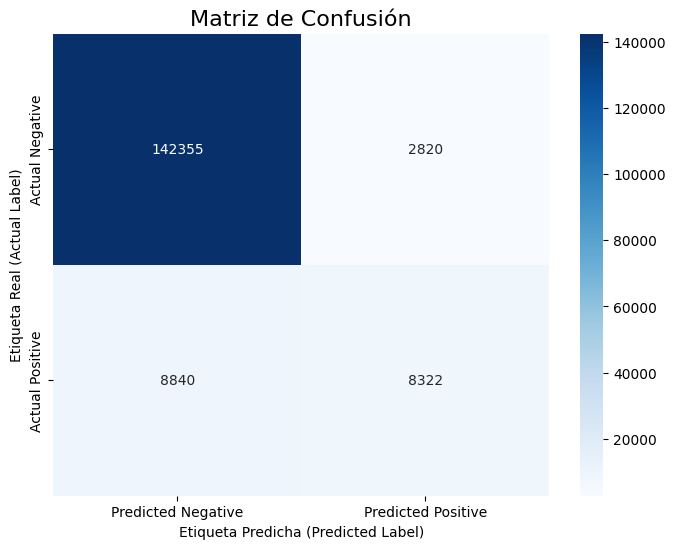

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Calculate Accuracy ---
# Accuracy is the proportion of correct predictions out of the total.
accuracy = accuracy_score(y_test, y_pred)

print(f"Exactitud (Accuracy) del modelo: {accuracy:.2%}")


# --- Step 2: Generate and plot the Confusion Matrix ---
# The confusion matrix shows the details of correct and incorrect predictions.
cm = confusion_matrix(y_test, y_pred)

# Plotting the matrix using a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Matriz de Confusi√≥n', fontsize=16)
plt.ylabel('Etiqueta Real (Actual Label)')
plt.xlabel('Etiqueta Predicha (Predicted Label)')
plt.show()

#### **10.2 Especificidad del Modelo de Regresi√≥n Log√≠stica**

La **Especificidad, tambi√©n conocida como la Tasa de Verdaderos Negativos**, es una m√©trica clave que mide la capacidad del modelo para identificar correctamente los casos negativos.

En el contexto de este problema, la especificidad responde a la pregunta:
- **De todos los individuos que en realidad no requirieron hospitalizaci√≥n, ¬øqu√© porcentaje fue clasificado correctamente por el modelo?**

Se calcula dividiendo los Verdaderos Negativos (TN) entre el total de negativos reales (TN + Falsos Positivos).

Una alta especificidad es importante porque indica que el modelo es fiable al identificar a la poblaci√≥n que no sufre el evento de inter√©s, minimizando los falsos positivos o "falsas alarmas".

In [ ]:
from sklearn.metrics import confusion_matrix

# --- Calculate Specificity from the Confusion Matrix ---

# Calculate the confusion matrix again
cm = confusion_matrix(y_test, y_pred)

# Extract the values: True Negatives (TN), False Positives (FP),
# False Negatives (FN), and True Positives (TP)
tn, fp, fn, tp = cm.ravel()

# Calculate specificity
# Specificity = True Negatives / (True Negatives + False Positives)
specificity = tn / (tn + fp)

print(f"Especificidad del modelo: {specificity:.2%}")

Especificidad del modelo: 98.06%


#### **10.3 M√©tricas de Clasificaci√≥n: Precisi√≥n y Sensibilidad (Recall)**

Para obtener una visi√≥n m√°s detallada del rendimiento del modelo sobre la clase positiva (pacientes hospitalizados), se analizan:

- **La Precisi√≥n (Precision)**
Mide la calidad de las predicciones positivas del modelo. Responde a la pregunta: **De todos los pacientes que el modelo predijo que ser√≠an hospitalizados, ¬øqu√© porcentaje realmente lo fue?**

Una alta precisi√≥n indica que el modelo es muy fiable cuando afirma que un paciente requiere hospitalizaci√≥n, minimizando los Falsos Positivos.

- **La Sensibilidad (Recall)**
Tambi√©n conocida como tasa de verdaderos positivos, mide la capacidad del modelo para encontrar todos los casos positivos reales. Responde a la pregunta: **De todos los pacientes que realmente fueron hospitalizados, ¬øqu√© porcentaje logr√≥ identificar el modelo?**

Una alta sensibilidad es fundamental en problemas m√©dicos, ya que indica que el modelo es eficaz para detectar a los individuos que necesitan atenci√≥n, minimizando los Falsos Negativos.

In [ ]:
from sklearn.metrics import classification_report

# This report provides precision and recall for each class
print("--- Classification Report ---")
print(classification_report(y_test, y_pred))

--- Classification Report ---
                    precision    recall  f1-score   support

No Hospitalization       0.94      0.98      0.96    145175
                 Y       0.75      0.48      0.59     17162

          accuracy                           0.93    162337
         macro avg       0.84      0.73      0.77    162337
      weighted avg       0.92      0.93      0.92    162337



## 10.4 Resumen de las m√©tricas del Modelo de Regresi√≥n Log√≠stica

| M√©trica | Valor | Interpretaci√≥n en el Contexto del Problema |
| :--- | :--- | :--- |
| **Exactitud** | 92.82% | Aciertos totales (m√©trica influenciada por el desbalance). |
| **Sensibilidad (Recall)** | **48%** | **PUNTO D√âBIL:** Capacidad de encontrar pacientes que S√ç necesitan hospitalizaci√≥n. |
| **Especificidad** | 98.06% | **PUNTO FUERTE:** Capacidad de descartar pacientes que NO necesitan hospitalizaci√≥n. |
| **Precisi√≥n** | 75% | Fiabilidad de las alarmas de "posible hospitalizaci√≥n". |

## 10.5 Gr√°fico de Caracter√≠sticas m√°s Influyentes en la Predicci√≥n de la Hospitalizaci√≥n

Este gr√°fico responde a la pregunta fundamental: ‚Äú**¬øQu√© caracter√≠sticas aprendi√≥ el modelo que son m√°s predictivas de una hospitalizaci√≥n?**‚Äù.

Para ello, se visualizan los coeficientes de regresi√≥n que el modelo asigna a cada caracter√≠stica. Estos coeficientes representan el impacto y la direcci√≥n de la influencia de cada variable en la predicci√≥n:

- **Coeficiente Positivo (barras azules)**: Indica que la presencia de esta caracter√≠stica aumenta la probabilidad de que el paciente sea hospitalizado. Cuanto m√°s grande el valor, mayor es su impacto.

- **Coeficiente Negativo (barras rojas)**: Indica que la presencia de esta caracter√≠stica disminuye la probabilidad de que el paciente sea hospitalizado.

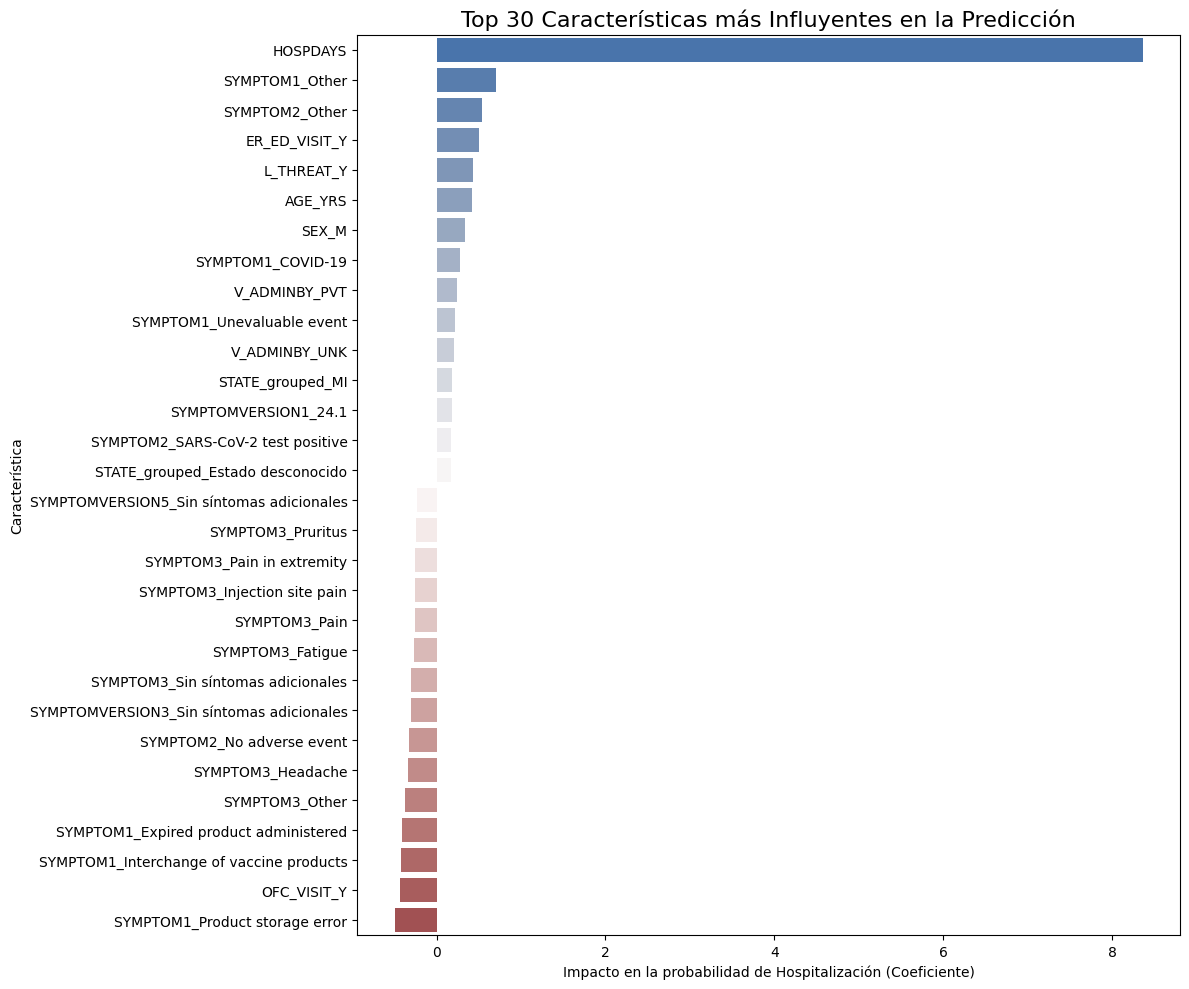

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the coefficients from the trained model
coefficients = log_reg_model.coef_[0]

# Get the feature names from the encoded DataFrame (before scaling)
feature_names = X_encoded.columns

# Create a DataFrame to view them together
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the features by their coefficient value
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Select the top N and bottom N features to plot
top_n = 15
top_features = pd.concat([feature_importance.head(top_n),
                          feature_importance.tail(top_n)])

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='vlag')
plt.title(f'Top {top_n*2} Caracter√≠sticas m√°s Influyentes en la Predicci√≥n', fontsize=16)
plt.xlabel('Impacto en la probabilidad de Hospitalizaci√≥n (Coeficiente)')
plt.ylabel('Caracter√≠stica')
plt.tight_layout()
plt.show()

# 11. Discusi√≥n de Resultados üî¨

El **modelo de Regresi√≥n Log√≠stica** fue entrenado exitosamente utilizando un conjunto de entrenamiento del 80% de los datos preprocesados. La evaluaci√≥n se realiz√≥ sobre el 20% restante, obteniendo una exactitud (accuracy) general del 92.82%.

- **El Paradigma del Modelo: Alta Exactitud, Bajo Impacto**

El modelo de Regresi√≥n Log√≠stica alcanz√≥ una alta **exactitud (accuracy) del 92.82%**. Sin embargo, este resultado es enga√±oso y est√° directamente influenciado por el fuerte desbalance de clases en los datos, donde los casos de "No Hospitalizaci√≥n" son mayoritarios. La **alta especificidad (98.06%)** confirma que el modelo es experto en identificar a la clase negativa, pero este √©xito en la mayor√≠a de los casos enmascara una debilidad fundamental.


- **El Punto Cr√≠tico: La Falla en la Detecci√≥n de Casos Positivos**

La debilidad cr√≠tica del modelo se revela en su **baja sensibilidad (recall), que es de solo un 48%**. Esto significa que el modelo **falla en detectar a m√°s de la mitad de los pacientes que s√≠ requirieron hospitalizaci√≥n**, identificando solo 8,322 de los 17,162 casos reales (como se muestra en la matri de confusi√≥n). Aunque su **precisi√≥n es del 75%** (es fiable cuando predice "positivo", es decir Hospitalizado), su incapacidad para encontrar la mayor√≠a de los casos es el hallazgo m√°s cr√≠tico.


‚ùì**Interpretaci√≥n del Modelo: ¬øQu√© Caracter√≠sticas son Clave para predecir la Hospitalizaci√≥n?**

El gr√°fico de importancia de caracter√≠sticas revela lo siguiente:

- **Los principales Predictores de Hospitalizaci√≥n (Coeficientes Positivos):**

**HOSPDAYS** (d√≠as de hospitalizaci√≥n), como era de esperar, fue la caracter√≠stica con mayor impacto positivo. Otras variables que aumentan significativamente la probabilidad de predicci√≥n de hospitalizaci√≥n incluyen las visitas a la sala de emergencias (**ER_ED_VISIT_Y**), la portaci√≥n de enfermedades potencialmente mortales (**L_THREAT_Y**) y la edad del paciente (AGE_YRS).

- **Los principales Factores "Protectores" (Coeficientes Negativos)**:

Caracter√≠sticas como **SYMPTOM1_Product storage error** (error de almacenamiento del producto, es decir de la vacuna) o **OFC_VISIT_Y** (visita al consultorio) disminuyen la probabilidad de una predicci√≥n de hospitalizaci√≥n. Esto sugiere que el modelo aprendi√≥ a asociar errores de administraci√≥n o visitas de rutina con eventos de menor severidad.

En general, este an√°lisis confirma que **el modelo ha aprendido patrones cl√≠nicamente coherentes**, asociando la severidad de los s√≠ntomas y la demograf√≠a del paciente con el riesgo de hospitalizaci√≥n.

üö© **Limitaciones Metodol√≥gicas**

Cabe destacar que el flujo de este proyecto fue moldeado por una restricci√≥n t√©cnica fundamental: el l√≠mite de memoria RAM del entorno. Idealmente, las t√©cnicas de reducci√≥n de dimensionalidad se explorar√≠an en iteraciones posteriores para optimizar un modelo base. Sin embargo, en este caso, la optimizaci√≥n de caracter√≠sticas se convirti√≥ en un prerrequisito fundamental para la viabilidad del modelado.

‚úÖ**Impacto de los Resultados**

El **bajo recall (48%)** es el hallazgo m√°s cr√≠tico. En un escenario real, esto significar√≠a que un sistema basado en este modelo no alertar√≠a sobre m√°s de la mitad de los casos de eventos adversos post-vacunaci√≥n que terminan en la hospitalizaci√≥n del paciente. Este nivel de falsos negativos podr√≠a tener consecuencias graves, como retrasos en la atenci√≥n m√©dica.

Por otro lado, la alta especificidad (98.06%) y la buena precisi√≥n (75%) indican que el sistema ser√≠a fiable para reducir "falsas alarmas", permitiendo que los recursos se concentren en los casos que identifica como de alto riesgo, aunque omita muchos otros.

# 12. Conclusiones Finales y Propuestas Futuras üìã

**Conclusiones Finales**

El modelo de regresi√≥n log√≠stica alcanz√≥ una alta exactitud del 92.82%, sin embrago este resultado se encuentra influenciado por el fuerte desbalance en los datos.
- La **principal debilidad es su baja sensibilidad (recall) del 48%**, lo que significa que no detecta a m√°s de la mitad de los casos de hospitalizaci√≥n.

Se concluye que, si bien el modelo es un buen punto de partida, que ha logrado **aprender patrones cl√≠nicamente coherentes**, su utilidad cl√≠nica es limitada por el **alto riesgo de omitir casos positivos**. Por lo tanto, es fundamental que las pr√≥ximas iteraciones se centren en mejorar la detecci√≥n de esta clase minoritaria.


**Mejoras Futuras para el Modelo de Machine Learning**

Para que el modelo sea viable en un entorno pr√°ctico, la prioridad absoluta es aumentar la sensibilidad. Las pr√≥ximas iteraciones deber√≠an enfocarse en:

- El **Manejo del Desbalance de los Datos**: Implementar t√©cnicas como el sobremuestreo de la clase minoritaria (SMOTE) o utilizar el par√°metro class_weight='balanced' en el modelo para forzarlo a prestar m√°s atenci√≥n a los casos de hospitalizaci√≥n.

- La **Exploraci√≥n de Otros Algoritmos**: Entrenar modelos m√°s complejos y robustos ante el desbalance, como **Random Forest** o **Gradient Boosting** (XGBoost), que podr√≠an capturar mejor las relaciones en los datos.

- **Ingenier√≠a de Caracter√≠sticas Avanzada**: Utilizar t√©cnicas de NLP (como TF-IDF) sobre las columnas de texto en lugar de la extracci√≥n manual, para capturar m√°s informaci√≥n de las narrativas.


**Propuesta de Implementaci√≥n Pr√°ctica**

Una vez mejorado, el modelo podr√≠a integrarse en un **sistema de triaje** o alerta temprana. No reemplazar√≠a el juicio humano, sino que actuar√≠a como una herramienta de apoyo para priorizar la revisi√≥n de reportes.

Los casos marcados por el modelo con un 'alto riesgo de hospitalizaci√≥n' ser√≠an escalados autom√°ticamente a un especialista para su an√°lisis. Adicionalmente, el sistema podr√≠a generar **alertas espec√≠ficas** si un reporte contiene las caracter√≠sticas que el modelo identific√≥ como de mayor impacto (ej. L_THREAT_Y;  ER_ED_VISIT_Y), incluso si la probabilidad general no es la m√°s alta. Esto a√±ade una capa extra de seguridad al sistema de triaje.

Esto **agilizar√≠a la detecci√≥n temprana de patrones y s√≠ntomas de riesgo en pacientes post-vacunaci√≥n** y permitir√≠a una intervenci√≥n m√°s r√°pida.